In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
%matplotlib inline
import os
os.chdir(r"C:\\Users\2112161\\OneDrive - Cognizant\Desktop\\DATA\\New folder\\scripsts python")
from scipy.stats import skew
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor,XGBRFClassifier,XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from pandas_profiling import ProfileReport


In [16]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=f0cc6258f0b57062301e14a30f3c35c031a0263c74abc9b1ca2a5fe996431903
  Stored in directory: c:\users\2112161\appdata\local\pip\cache\wheels\83\8b\7c\09ae60c42c7ba4ed2dddaf2b8b9186cb105255856d6ed3dba5
Successfully built python-docx


In [5]:
tran=pd.read_excel('Mouth and Dental Test.xlsx',sheet_name='Transactions')
tran

HOUSEHOLD_ID        TXN_ID     TXN_DT    TXN_TM         UPC_ID  \
0          -145120321024  145120321024 2010-03-01  12:13:00  8850002022461   
1          -108219184928  108219184928 2010-03-01  20:27:00  8850007811671   
2          -134208122317  134208122317 2010-03-01  13:14:00  8850006303405   
3          -114124194973  114124194973 2010-03-01  21:21:00  8850006303283   
4       7711113700122360  152104353152 2010-03-02  13:40:00  8850006303405   
...                  ...           ...        ...       ...            ...   
222992  7711114000256410  140106216297 2010-03-21  12:14:00  8850007811213   
222993  7711112200138350  122122157135 2010-03-21  20:36:00  8850006303290   
222994     -131111301361  131111301361 2010-03-21  13:14:00  8850007811473   
222995     -126315146456  126315146456 2010-03-21  12:42:00  8850007811237   
222996     -104113022368  104113022368 2010-03-21  15:34:00  8850007811237   

        NET_AMT  MKDN_AMT  GROSS_AMT  ITEM_QTY  STORE_ID  
0          58.5      36.5       95.0         1     11145  
1         115.0       8.0      123.0         1     11108  
2          32.0       0.0       32.0         1     11134  
3          99.0      17.0      116.0         1     11114  
4          32.0       0.0       32.0         1     11152  
...         ...       ...        ...       ...       ...  
222992     57.5       0.0       57.5         1     11140  
222993     99.0      17.0      116.0         1     11122  
222994     79.0      28.0      107.0         1     11131  
222995     79.0      28.0      107.0         1     11126  
222996     79.0      28.0      107.0         1     11104  

[222997 rows x 10 columns]

In [6]:
prod=pd.read_excel('Mouth and Dental Test.xlsx',sheet_name='Products')
prod

UPC_ID                           UPC_DESCRIPTION    L4_ID  \
0   8851145600622                    BIGC DENTAL FLOSS 50M.  4602003   
1   8854604200791          BIGC MOUTHWASH 250ML. ORANGEMINT  4602003   
2   8854604200753             BIGC MOUTHWASH 250ML COOLMINT  4602003   
3   8851145600615          BIGC TOOTHPICK+DENTAL FLOSS20PCS  4602003   
4   8850662621035  BIGC BREATH FRESHENER15ML. PEPPERMINT(M)  4602003   
..            ...                                       ...      ...   
84  8850002017887             SYSTEMA 250ML.GREEN FOREST(P)  4602003   
85  8850002017986              SYSTEMA500ML.BLUE CARRIBBEAN  4602003   
86  8850002020511                          SYSTEMA250ML.(M)  4602003   
87  8850002018006                SYSTEMA 750ML.BLUECARIBEAN  4602003   
88  8850002017900                SYSTEMA 500ML.GREEN FOREST  4602003   

            CATE      L5_ID      SUB_CATE                 MANUFACTURER_NAME  \
0   MOUTH&DENTAL  460200301  DENTAL FLOSS         6300088:รินทร์โชคชัย บจก.   
1   MOUTH&DENTAL  460200302     MOUTHWASH  6300349:เยเนอรัลแคร์โปรดักส์บจก.   
2   MOUTH&DENTAL  460200302     MOUTHWASH  6300349:เยเนอรัลแคร์โปรดักส์บจก.   
3   MOUTH&DENTAL  460200301  DENTAL FLOSS         6300088:รินทร์โชคชัย บจก.   
4   MOUTH&DENTAL  460200303   MOUTH SPRAY                6300095:เรดอน บจก.   
..           ...        ...           ...                               ...   
84  MOUTH&DENTAL  460200302     MOUTHWASH          6002593:สหพัฒนพิบูล บมจ.   
85  MOUTH&DENTAL  460200302     MOUTHWASH          6002593:สหพัฒนพิบูล บมจ.   
86  MOUTH&DENTAL  460200302     MOUTHWASH          6002593:สหพัฒนพิบูล บมจ.   
87  MOUTH&DENTAL  460200302     MOUTHWASH          6002593:สหพัฒนพิบูล บมจ.   
88  MOUTH&DENTAL  460200302     MOUTHWASH          6002593:สหพัฒนพิบูล บมจ.   

   BRAND_NAME  
0        BIGC  
1        BIGC  
2        BIGC  
3        BIGC  
4        BIGC  
..        ...  
84    SYSTEMA  
85    SYSTEMA  
86    SYSTEMA  
87    SYSTEMA  
88    SYSTEMA  

[89 rows x 8 columns]

In [7]:
store=pd.read_excel('Mouth and Dental Test.xlsx',sheet_name='Stores')
store

STORE_ID        STORE_NAME RETAILER_GROUP_NM                AREA_NM
0      11124              Ubon       HYPERMARKET       Northeast Region
1      11134  Pattaya 2 Horeca       HYPERMARKET            East Region
2      11102   Chaengwattana 1       HYPERMARKET  Bangkok and Perimeter
3      11145       Sakolnakorn       HYPERMARKET       Northeast Region
4      11116             Rama2       HYPERMARKET  Bangkok and Perimeter
..       ...               ...               ...                    ...
92     11146             Phare       HYPERMARKET           North Region
93     11112       Suratthanee       HYPERMARKET           South Region
94     11106          Bangplee       HYPERMARKET  Bangkok and Perimeter
95     11107      Nakornpathom       HYPERMARKET  Bangkok and Perimeter
96     21016        MBC Donwhy          MINIBIGC  Bangkok and Perimeter

[97 rows x 4 columns]

In [5]:
tran.isnull().sum()

HOUSEHOLD_ID    0
TXN_ID          0
TXN_DT          0
TXN_TM          0
UPC_ID          0
NET_AMT         0
MKDN_AMT        0
GROSS_AMT       0
ITEM_QTY        0
STORE_ID        0
dtype: int64

In [6]:
prod.isnull().sum()

UPC_ID               0
UPC_DESCRIPTION      0
L4_ID                0
CATE                 0
L5_ID                0
SUB_CATE             0
MANUFACTURER_NAME    0
BRAND_NAME           0
dtype: int64

In [7]:
store.isnull().sum()

STORE_ID             0
STORE_NAME           0
RETAILER_GROUP_NM    0
AREA_NM              0
dtype: int64

In [8]:
tranrep = ProfileReport(tran)
tranrep.to_file(output_file='output1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\2112161\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
tranrep

In [9]:
prodrep = ProfileReport(prod)
prodrep.to_file(output_file='output2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
prodrep

In [10]:
storerep = ProfileReport(store)
storerep.to_file(output_file='output3.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
storerep

<AxesSubplot:>

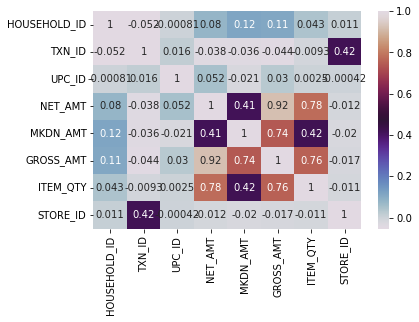

In [12]:
sns.heatmap(tran.corr(),cmap='twilight',annot=True)

In [48]:
#see the main colored boxex which show in above for tran table show how diff fields are correlated strongly
tran.columns

Index(['HOUSEHOLD_ID', 'TXN_ID', 'TXN_DT', 'TXN_TM', 'UPC_ID', 'NET_AMT',
       'MKDN_AMT', 'GROSS_AMT', 'ITEM_QTY', 'STORE_ID'],
      dtype='object')

<AxesSubplot:>

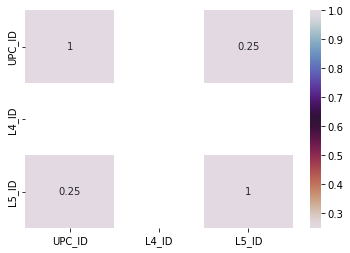

In [61]:
sns.heatmap(prod.corr(),cmap='twilight_r',annot=True)

<AxesSubplot:>

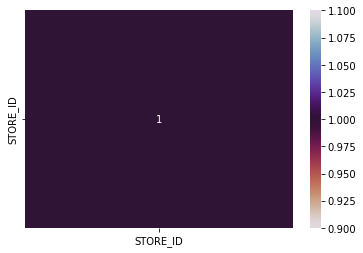

In [62]:
sns.heatmap(store.corr(),cmap='twilight_r',annot=True)

<AxesSubplot:>

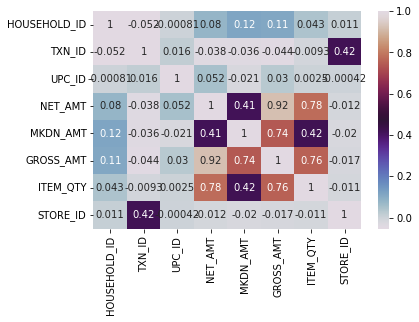

In [13]:
sns.heatmap(tran.corr(),cmap='twilight',annot=True)

In [12]:
import datetime
pd.DatetimeIndex(tran.TXN_DT).year.value_counts()


2010    127359
2011     95638
Name: TXN_DT, dtype: int64

In [13]:
tran['year']=pd.DatetimeIndex(tran.TXN_DT).year

In [14]:
tran.groupby('year')['NET_AMT'].sum()

year
2010    12016212.5
2011     9946997.5
Name: NET_AMT, dtype: float64

In [38]:
(9946997.5-12016212.5)/(12016212.5)

-0.17220193134900036

In [15]:
#d1.pivot_table(index='country',columns='type',values='title',aggfunc='count')
t=pd.DataFrame(tran.pivot_table(index='STORE_ID',columns='year',values='NET_AMT',aggfunc='sum'))
#t['change']=t['2011']-t['2010']
#t.2011
#t.isnull().mean()*100
t.fillna(0,inplace=True)
#t.columns=['year2010','year2011','diff']
t['diff']=(t.iloc[:,-1]-t.iloc[:,0])/(t.iloc[:,0])*100
#t[(t['diff']> -100) & (t['diff']< 100) ]
t.columns=['year2010','year2011','diff']
t.drop(index=t[t['diff']==np.inf].index,inplace=True)
t

year2010  year2011        diff
STORE_ID                                
105       358759.5       0.0 -100.000000
603          820.0       0.0 -100.000000
605          544.0     808.5   48.621324
608          467.0     487.0    4.282655
610          885.0    1442.0   62.937853
...            ...       ...         ...
21002       6592.0    4241.5  -35.656857
21003       2274.0    2963.0   30.299033
21004       1598.0    2753.5   72.309136
21005        549.0    1279.0  132.969035
21006        336.0     459.5   36.755952

[79 rows x 3 columns]

In [1093]:
tt=pd.concat([pd.DataFrame(t.index),
pd.DataFrame(t['year2010'].values),
pd.DataFrame(t['year2011'].values),
pd.DataFrame(t['diff'].values)],axis=1)
tt.columns=['STORE_ID','year2010','year2011','diff']
tt

STORE_ID  year2010  year2011        diff
0        105  358759.5       0.0 -100.000000
1        603     820.0       0.0 -100.000000
2        605     544.0     808.5   48.621324
3        608     467.0     487.0    4.282655
4        610     885.0    1442.0   62.937853
..       ...       ...       ...         ...
74     21002    6592.0    4241.5  -35.656857
75     21003    2274.0    2963.0   30.299033
76     21004    1598.0    2753.5   72.309136
77     21005     549.0    1279.0  132.969035
78     21006     336.0     459.5   36.755952

[79 rows x 4 columns]

In [1094]:
tt.drop(tt[tt['diff']==tt['diff'].max()]['diff'].index,inplace=True)#outlier removal
tt#total 78 store after removing inf

STORE_ID  year2010  year2011        diff
0        105  358759.5       0.0 -100.000000
1        603     820.0       0.0 -100.000000
2        605     544.0     808.5   48.621324
3        608     467.0     487.0    4.282655
4        610     885.0    1442.0   62.937853
..       ...       ...       ...         ...
74     21002    6592.0    4241.5  -35.656857
75     21003    2274.0    2963.0   30.299033
76     21004    1598.0    2753.5   72.309136
77     21005     549.0    1279.0  132.969035
78     21006     336.0     459.5   36.755952

[78 rows x 4 columns]

In [1095]:
tt[(tt['diff']> -100) & (tt['diff']<=0)]#store that gave -ve sales 65 out of 78

STORE_ID  year2010  year2011       diff
6      11101  184596.0  141827.0 -23.168974
7      11102  205986.5  154671.0 -24.912069
8      11103  100189.0   82007.0 -18.147701
9      11104  214944.5  202155.0  -5.950141
10     11106  291737.0  231423.0 -20.674100
..       ...       ...       ...        ...
68     11164   62240.0   58202.0  -6.487789
69     11165   51038.5   42923.0 -15.900742
70     11166  100141.0   66709.0 -33.384927
71     11167   68202.0   41734.0 -38.808246
74     21002    6592.0    4241.5 -35.656857

[65 rows x 4 columns]

Text(0, 0.5, 'Frequency of sales percentage ')

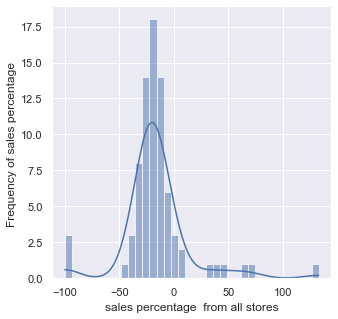

In [1084]:
sns.histplot(tt['diff'],palette='autumn',kde=True)#so -neg sales were between -100 to 0 or -50 to 0
plt.xlabel('sales percentage  from all stores')
plt.ylabel('Frequency of sales percentage ')

In [1097]:
65/78

0.8333333333333334

In [1099]:
tt[tt['diff']==-100]['STORE_ID']#stores with no sales

0    105
1    603
5    611
Name: STORE_ID, dtype: int64

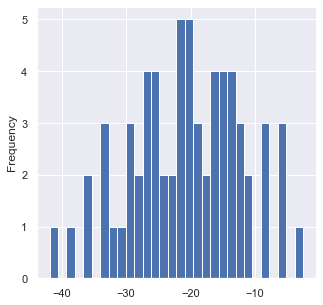

In [1044]:
d=tt[(tt['diff']> -100) & (tt['diff']<=0)]
d['diff'].plot(kind='hist',bins=30)
plt.rcParams['figure.figsize']=5,5

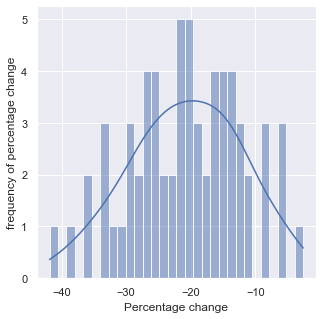

In [1026]:
sns.histplot(d['diff'],bins=30,stat='count',kde='True')
#plt.plot(t['diff'])#stat='frequency')
plt.ylabel('frequency of percentage change')
plt.xlabel('Percentage change')#between -20 to -10 there' more -ve sales hence from varios store
plt.rcParams['figure.figsize']=5,5

In [ ]:
t[(t['diff']> -100) & (t['diff']< 100) ]

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff'>

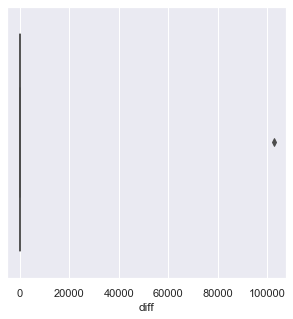

In [1036]:
sns.boxplot(tt[tt['diff']>=0]['diff'])#outlier

In [1029]:
len(tt[tt['diff']>=0])#1/7th or almost 15% of stores gave pos sales while alsomost

11

In [1030]:
len(tt[(tt['diff']> -100) & (tt['diff']<=0)])#almost 85% of stores gave -neg sales

65

In [1033]:
6/7

0.8571428571428571

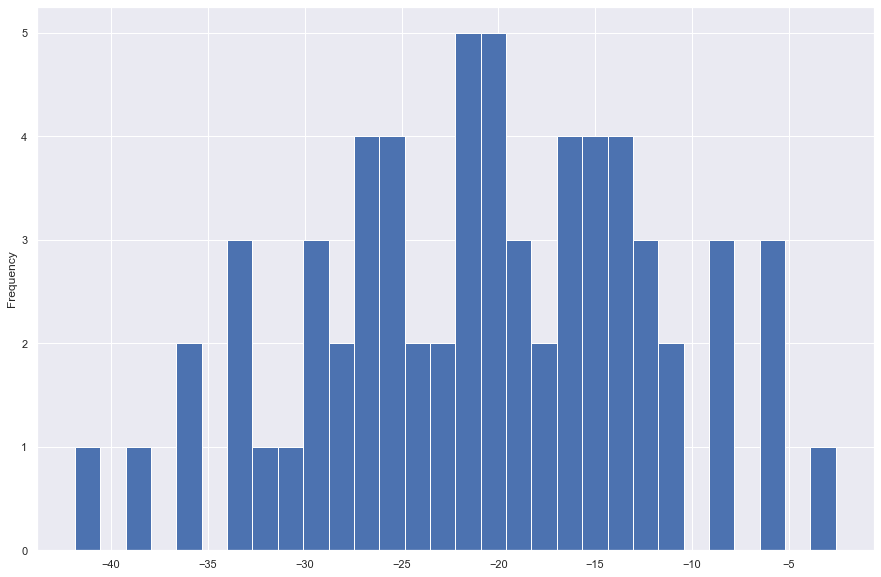

In [1008]:
d=tt[(tt['diff']> -100) & (tt['diff']<=0)]
d['diff'].plot(kind='hist',bins=30)
plt.rcParams['figure.figsize']=15,10

In [815]:
tt[(tt['diff']> -100) & (tt['diff']<=0)]

STORE_ID  year2010  year2011       diff
6      11101  184596.0  141827.0 -23.168974
7      11102  205986.5  154671.0 -24.912069
8      11103  100189.0   82007.0 -18.147701
9      11104  214944.5  202155.0  -5.950141
10     11106  291737.0  231423.0 -20.674100
..       ...       ...       ...        ...
68     11164   62240.0   58202.0  -6.487789
69     11165   51038.5   42923.0 -15.900742
70     11166  100141.0   66709.0 -33.384927
71     11167   68202.0   41734.0 -38.808246
80     21002    6592.0    4241.5 -35.656857

[65 rows x 4 columns]

In [21]:
count=pd.concat([pd.DataFrame(Counter(t['diff']).keys()),pd.DataFrame(Counter(t['diff']).values())],axis=1)
count.columns=['diff','count']
z1=count[(count['diff'] >=-25) & (count['diff']<=0)]
z1

diff  count
4  -23.168974      1
5  -24.912069      1
6  -18.147701      1
7   -5.950141      1
8  -20.674100      1
10 -14.841038      1
11 -21.344108      1
12 -13.671716      1
14 -20.827537      1
15 -18.649854      1
16  -5.659483      1
17 -12.567432      1
18 -21.146014      1
19 -18.946585      1
23 -20.341725      1
24  -8.521218      1
26 -13.528758      1
27 -23.438776      1
28 -16.090240      1
29 -16.417712      1
32 -18.872328      1
33  -2.566759      1
34 -19.724567      1
35 -17.459890      1
37  -8.197647      1
38 -11.578104      1
39 -21.274277      1
40 -24.802349      1
41 -24.893021      1
42 -12.501203      1
46 -14.585234      1
47  -8.338799      1
48 -21.930689      1
49 -15.058538      1
55 -20.181860      1
56 -15.177910      1
57 -10.669989      1
59 -23.613669      1
60 -13.436002      1
61 -22.029831      1
62 -13.767143      1
63 -12.701236      1
65 -15.769630      1
66  -6.487789      1
67 -15.900742      1

In [17]:
x=Counter(t['diff']).keys()
y=[]
for i in x:
    if i>=-25 and i<=0:
        y.append(i)
        
z=pd.DataFrame(y)
z.columns=['diff']
z

diff
0  -23.168974
1  -24.912069
2  -18.147701
3   -5.950141
4  -20.674100
5  -14.841038
6  -21.344108
7  -13.671716
8  -20.827537
9  -18.649854
10  -5.659483
11 -12.567432
12 -21.146014
13 -18.946585
14 -20.341725
15  -8.521218
16 -13.528758
17 -23.438776
18 -16.090240
19 -16.417712
20 -18.872328
21  -2.566759
22 -19.724567
23 -17.459890
24  -8.197647
25 -11.578104
26 -21.274277
27 -24.802349
28 -24.893021
29 -12.501203
30 -14.585234
31  -8.338799
32 -21.930689
33 -15.058538
34 -20.181860
35 -15.177910
36 -10.669989
37 -23.613669
38 -13.436002
39 -22.029831
40 -13.767143
41 -12.701236
42 -15.769630
43  -6.487789
44 -15.900742

#pd.merge(left=n1,right=n2,how="inner",left_on=["Seller_City"],right_on=["City"],indicator="indicator")
#pd.merge(left=t,right=z,how="inner",left_on=["diff"],right_on=["values"])
m=pd.merge(t,z,how="inner",on=["diff"])
for i in t['diff']:
    #if i==t['diff']:
        print(i)

In [18]:
negsto=t[t['diff'].isin(y)]#finally got it
negsto

year2010  year2011       diff
STORE_ID                               
11101     184596.0  141827.0 -23.168974
11102     205986.5  154671.0 -24.912069
11103     100189.0   82007.0 -18.147701
11104     214944.5  202155.0  -5.950141
11106     291737.0  231423.0 -20.674100
11108     311710.0  265449.0 -14.841038
11109     167189.0  131504.0 -21.344108
11110     310191.5  267783.0 -13.671716
11112     219253.0  173588.0 -20.827537
11113     255439.0  207800.0 -18.649854
11114     234138.0  220887.0  -5.659483
11115     183888.0  160778.0 -12.567432
11116     306663.0  241816.0 -21.146014
11117     288281.5  233662.0 -18.946585
11121     185763.5  147976.0 -20.341725
11122     286567.0  262148.0  -8.521218
11124     193066.5  166947.0 -13.528758
11125     143853.5  110136.0 -23.438776
11126     301353.5  252865.0 -16.090240
11127     180521.5  150884.0 -16.417712
11130     203321.5  164950.0 -18.872328
11131     177636.5  173077.0  -2.566759
11132     212030.0  170208.0 -19.724567
11133     237816.5  196294.0 -17.459890
11135     214311.5  196743.0  -8.197647
11136     250801.0  221763.0 -11.578104
11137     182142.5  143393.0 -21.274277
11138     286743.0  215624.0 -24.802349
11139     122337.5   91884.0 -24.893021
11140     161092.5  140954.0 -12.501203
11144     120574.0  102988.0 -14.585234
11145     114345.0  104810.0  -8.338799
11146     138044.0  107770.0 -21.930689
11147      88617.5   75273.0 -15.058538
11153     124381.5   99279.0 -20.181860
11154     137077.5  116272.0 -15.177910
11155     109569.0   97878.0 -10.669989
11157      48870.0   37330.0 -23.613669
11158      77791.0   67339.0 -13.436002
11159      32919.0   25667.0 -22.029831
11160      42837.5   36940.0 -13.767143
11161      67458.0   58890.0 -12.701236
11163      55432.5   46691.0 -15.769630
11164      62240.0   58202.0  -6.487789
11165      51038.5   42923.0 -15.900742

In [19]:
negstoreid=negsto.index.values
negstoreid

array([11101, 11102, 11103, 11104, 11106, 11108, 11109, 11110, 11112,
       11113, 11114, 11115, 11116, 11117, 11121, 11122, 11124, 11125,
       11126, 11127, 11130, 11131, 11132, 11133, 11135, 11136, 11137,
       11138, 11139, 11140, 11144, 11145, 11146, 11147, 11153, 11154,
       11155, 11157, 11158, 11159, 11160, 11161, 11163, 11164, 11165],
      dtype=int64)

In [26]:
ss=t[t['diff'].isin(z1['diff'])]
ss#anpother way

year2010  year2011       diff
STORE_ID                               
11101     184596.0  141827.0 -23.168974
11102     205986.5  154671.0 -24.912069
11103     100189.0   82007.0 -18.147701
11104     214944.5  202155.0  -5.950141
11106     291737.0  231423.0 -20.674100
11108     311710.0  265449.0 -14.841038
11109     167189.0  131504.0 -21.344108
11110     310191.5  267783.0 -13.671716
11112     219253.0  173588.0 -20.827537
11113     255439.0  207800.0 -18.649854
11114     234138.0  220887.0  -5.659483
11115     183888.0  160778.0 -12.567432
11116     306663.0  241816.0 -21.146014
11117     288281.5  233662.0 -18.946585
11121     185763.5  147976.0 -20.341725
11122     286567.0  262148.0  -8.521218
11124     193066.5  166947.0 -13.528758
11125     143853.5  110136.0 -23.438776
11126     301353.5  252865.0 -16.090240
11127     180521.5  150884.0 -16.417712
11130     203321.5  164950.0 -18.872328
11131     177636.5  173077.0  -2.566759
11132     212030.0  170208.0 -19.724567
11133     237816.5  196294.0 -17.459890
11135     214311.5  196743.0  -8.197647
11136     250801.0  221763.0 -11.578104
11137     182142.5  143393.0 -21.274277
11138     286743.0  215624.0 -24.802349
11139     122337.5   91884.0 -24.893021
11140     161092.5  140954.0 -12.501203
11144     120574.0  102988.0 -14.585234
11145     114345.0  104810.0  -8.338799
11146     138044.0  107770.0 -21.930689
11147      88617.5   75273.0 -15.058538
11153     124381.5   99279.0 -20.181860
11154     137077.5  116272.0 -15.177910
11155     109569.0   97878.0 -10.669989
11157      48870.0   37330.0 -23.613669
11158      77791.0   67339.0 -13.436002
11159      32919.0   25667.0 -22.029831
11160      42837.5   36940.0 -13.767143
11161      67458.0   58890.0 -12.701236
11163      55432.5   46691.0 -15.769630
11164      62240.0   58202.0  -6.487789
11165      51038.5   42923.0 -15.900742

In [27]:
negst=store[store.STORE_ID.isin(negstoreid)] #these are the stores that are given less sales or 've sales'
negst

STORE_ID        STORE_NAME RETAILER_GROUP_NM                AREA_NM
0      11124              Ubon       HYPERMARKET       Northeast Region
2      11102   Chaengwattana 1       HYPERMARKET  Bangkok and Perimeter
3      11145       Sakolnakorn       HYPERMARKET       Northeast Region
4      11116             Rama2       HYPERMARKET  Bangkok and Perimeter
5      11140             Surin       HYPERMARKET       Northeast Region
6      11157           Banpong       HYPERMARKET           South Region
7      11160             Krabi       HYPERMARKET           South Region
11     11159         Phechabun       HYPERMARKET         Central Region
14     11138         Samrong 1       HYPERMARKET  Bangkok and Perimeter
17     11108         Rangsit 1       HYPERMARKET  Bangkok and Perimeter
18     11103   Radburana JUMBO             JUMBO  Bangkok and Perimeter
19     11158       Chaiyaphoom       HYPERMARKET       Northeast Region
20     11127       Chiangmai 1       HYPERMARKET           North Region
21     11122           Huamark       HYPERMARKET  Bangkok and Perimeter
24     11125        Don Mueang       HYPERMARKET  Bangkok and Perimeter
25     11155   Ayuttaya Horeca       HYPERMARKET         Central Region
26     11144           Ekkamai       HYPERMARKET  Bangkok and Perimeter
27     11126    Fashion Island       HYPERMARKET  Bangkok and Perimeter
28     11136        Saphankwai       HYPERMARKET  Bangkok and Perimeter
33     11163          Yasothon       HYPERMARKET       Northeast Region
34     11147        Ratchaburi       HYPERMARKET           South Region
40     11104         Pattaya 1       HYPERMARKET            East Region
43     11164            Sakhew       HYPERMARKET            East Region
44     11153           Buriram       HYPERMARKET       Northeast Region
45     11131        Ladphrao 1       HYPERMARKET  Bangkok and Perimeter
49     11115            Rayong       HYPERMARKET            East Region
51     11114   Rattanatibeth 1       HYPERMARKET  Bangkok and Perimeter
54     11133           Tiwanon       HYPERMARKET  Bangkok and Perimeter
56     11101        Wongsawang       HYPERMARKET  Bangkok and Perimeter
57     11130            Bangna       HYPERMARKET  Bangkok and Perimeter
58     11113         Pisanulok       HYPERMARKET         Central Region
62     11137    Chachoengsao 1       HYPERMARKET            East Region
66     11132         Daokanong       HYPERMARKET  Bangkok and Perimeter
67     11117         Chiangrai       HYPERMARKET           North Region
69     11154        Hangdong 1       HYPERMARKET           North Region
71     11161  Navanakorn JUMBO             JUMBO  Bangkok and Perimeter
72     11135     Nakhonsawan 1       HYPERMARKET         Central Region
82     11165      Varinchamrab       HYPERMARKET       Northeast Region
86     11109       Udonthani 1       HYPERMARKET       Northeast Region
87     11121          Hatyai 1       HYPERMARKET           South Region
90     11139           Pattani       HYPERMARKET           South Region
91     11110          Khonkaen       HYPERMARKET       Northeast Region
92     11146             Phare       HYPERMARKET           North Region
93     11112       Suratthanee       HYPERMARKET           South Region
94     11106          Bangplee       HYPERMARKET  Bangkok and Perimeter

Bangkok and Perimeter    52
Northeast Region         13
South Region             10
East Region               8
Central Region            8
North Region              6
Name: AREA_NM, dtype: int64

In [28]:
#pd.merge(left=t,right=z,how="inner",left_on=["diff"],right_on=["values"])
m=pd.merge(negst,ss,how="inner",on=["STORE_ID"])
m.rename(columns={2010:'year2010',2011:'year2011'},inplace=True)
m

STORE_ID        STORE_NAME RETAILER_GROUP_NM                AREA_NM  \
0      11124              Ubon       HYPERMARKET       Northeast Region   
1      11102   Chaengwattana 1       HYPERMARKET  Bangkok and Perimeter   
2      11145       Sakolnakorn       HYPERMARKET       Northeast Region   
3      11116             Rama2       HYPERMARKET  Bangkok and Perimeter   
4      11140             Surin       HYPERMARKET       Northeast Region   
5      11157           Banpong       HYPERMARKET           South Region   
6      11160             Krabi       HYPERMARKET           South Region   
7      11159         Phechabun       HYPERMARKET         Central Region   
8      11138         Samrong 1       HYPERMARKET  Bangkok and Perimeter   
9      11108         Rangsit 1       HYPERMARKET  Bangkok and Perimeter   
10     11103   Radburana JUMBO             JUMBO  Bangkok and Perimeter   
11     11158       Chaiyaphoom       HYPERMARKET       Northeast Region   
12     11127       Chiangmai 1       HYPERMARKET           North Region   
13     11122           Huamark       HYPERMARKET  Bangkok and Perimeter   
14     11125        Don Mueang       HYPERMARKET  Bangkok and Perimeter   
15     11155   Ayuttaya Horeca       HYPERMARKET         Central Region   
16     11144           Ekkamai       HYPERMARKET  Bangkok and Perimeter   
17     11126    Fashion Island       HYPERMARKET  Bangkok and Perimeter   
18     11136        Saphankwai       HYPERMARKET  Bangkok and Perimeter   
19     11163          Yasothon       HYPERMARKET       Northeast Region   
20     11147        Ratchaburi       HYPERMARKET           South Region   
21     11104         Pattaya 1       HYPERMARKET            East Region   
22     11164            Sakhew       HYPERMARKET            East Region   
23     11153           Buriram       HYPERMARKET       Northeast Region   
24     11131        Ladphrao 1       HYPERMARKET  Bangkok and Perimeter   
25     11115            Rayong       HYPERMARKET            East Region   
26     11114   Rattanatibeth 1       HYPERMARKET  Bangkok and Perimeter   
27     11133           Tiwanon       HYPERMARKET  Bangkok and Perimeter   
28     11101        Wongsawang       HYPERMARKET  Bangkok and Perimeter   
29     11130            Bangna       HYPERMARKET  Bangkok and Perimeter   
30     11113         Pisanulok       HYPERMARKET         Central Region   
31     11137    Chachoengsao 1       HYPERMARKET            East Region   
32     11132         Daokanong       HYPERMARKET  Bangkok and Perimeter   
33     11117         Chiangrai       HYPERMARKET           North Region   
34     11154        Hangdong 1       HYPERMARKET           North Region   
35     11161  Navanakorn JUMBO             JUMBO  Bangkok and Perimeter   
36     11135     Nakhonsawan 1       HYPERMARKET         Central Region   
37     11165      Varinchamrab       HYPERMARKET       Northeast Region   
38     11109       Udonthani 1       HYPERMARKET       Northeast Region   
39     11121          Hatyai 1       HYPERMARKET           South Region   
40     11139           Pattani       HYPERMARKET           South Region   
41     11110          Khonkaen       HYPERMARKET       Northeast Region   
42     11146             Phare       HYPERMARKET           North Region   
43     11112       Suratthanee       HYPERMARKET           South Region   
44     11106          Bangplee       HYPERMARKET  Bangkok and Perimeter   

    year2010  year2011       diff  
0   193066.5  166947.0 -13.528758  
1   205986.5  154671.0 -24.912069  
2   114345.0  104810.0  -8.338799  
3   306663.0  241816.0 -21.146014  
4   161092.5  140954.0 -12.501203  
5    48870.0   37330.0 -23.613669  
6    42837.5   36940.0 -13.767143  
7    32919.0   25667.0 -22.029831  
8   286743.0  215624.0 -24.802349  
9   311710.0  265449.0 -14.841038  
10  100189.0   82007.0 -18.147701  
11   77791.0   67339.0 -13.436002  
12  180521.5  150884.0 -16.417712  
13  286567.0  262148.0  -8.521218  
14  143853.5 

In [29]:
areasales=m.groupby('AREA_NM')['year2010','year2011'].sum()#areawise sales
areasales

C:\Users\2112161\AppData\Local\Temp\2/ipykernel_1812/3177029541.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  areasales=m.groupby('AREA_NM')['year2010','year2011'].sum()#areawise sales


year2010   year2011
AREA_NM                                    
Bangkok and Perimeter  3923174.0  3267023.0
Central Region          612238.5   528088.0
East Region             643215.0   564528.0
North Region            743924.5   608588.0
Northeast Region       1254528.0  1068230.0
South Region            707679.0   562991.0

In [80]:
tran.pivot_table(index='AREA_NM',columns='year',values='NET_AMT',aggfunc='sum')

KeyError: 'AREA_NM'

In [78]:
cc1=pd.merge(tran,store,how='inner',on='STORE_ID')
cc2=cc1.pivot_table(index='AREA_NM',columns='year',values='NET_AMT',aggfunc='sum')
cc2.columns=['year2010','year2011']
cc2['diff']=(cc2.year2011-cc2.year2010)/cc2.year2010
cc2

year2010   year2011      diff
AREA_NM                                              
Bangkok and Perimeter  6032155.5  4883003.5 -0.190504
Central Region          994821.0   898028.5 -0.097296
East Region            1033127.0   946085.0 -0.084251
North Region           1146762.5   906437.0 -0.209569
Northeast Region       1695202.5  1420780.0 -0.161882
South Region           1114144.0   892663.5 -0.198790

In [84]:
c2

array([3267023.,  528088.,  564528.,  608588., 1068230.,  562991.])

C:\Users\2112161\AppData\Local\Temp\13/ipykernel_30940/2867695452.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(abs(cc2['diff']),explode=explode,labels=list(cc2.index),colors=colors,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 20})#changing d to f%


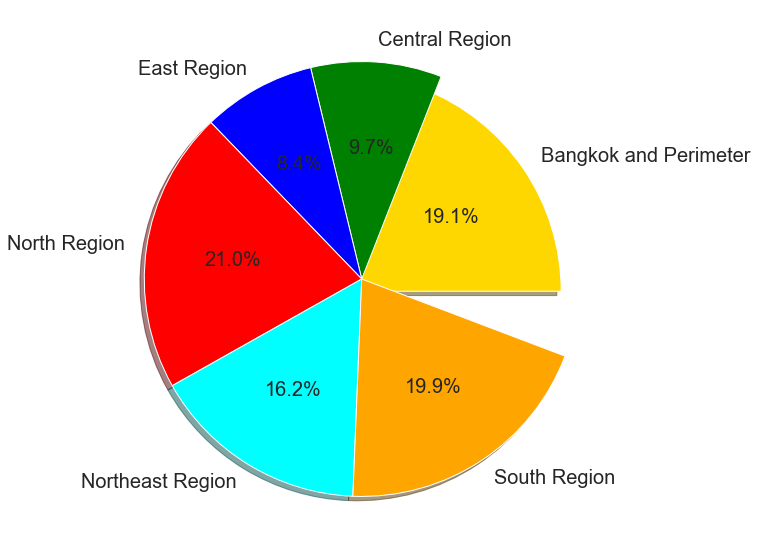

In [1323]:
colors=['gold','green','blue','red','cyan','orange']
explode=(-0,0,0,0,0,0)#this tel how far the split will go
plt.pie(abs(cc2['diff']),explode=explode,labels=list(cc2.index),colors=colors,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 20})#changing d to f%
plt.show()

class       men       woman   children
0   first   0.91468    0.667971   0.660562
1   second  0.30012    0.329380   0.882608
2   third   0.11899    0.189747   0.121259

In [1320]:
list(cc2.index)

['Bangkok and Perimeter',
 'Central Region',
 'East Region',
 'North Region',
 'Northeast Region',
 'South Region']

In [32]:
cc=pd.concat([pd.DataFrame(areasales.index), pd.DataFrame(areasales[['year2010']].values),
  pd.DataFrame(areasales[['year2011']].values)],
 axis=1)
cc.columns=['AREA_NM','year2010','year2011']
cc['diff']=(cc.year2011-cc.year2010)/cc.year2010 * 100
cc
 
 #fform every region those above stores gave neg sales

AREA_NM   year2010   year2011       diff
0  Bangkok and Perimeter  3923174.0  3267023.0 -16.725004
1         Central Region   612238.5   528088.0 -13.744725
2            East Region   643215.0   564528.0 -12.233390
3           North Region   743924.5   608588.0 -18.192236
4       Northeast Region  1254528.0  1068230.0 -14.850047
5           South Region   707679.0   562991.0 -20.445428

In [1304]:
cc['diff'].mean()

-20.208515058351153

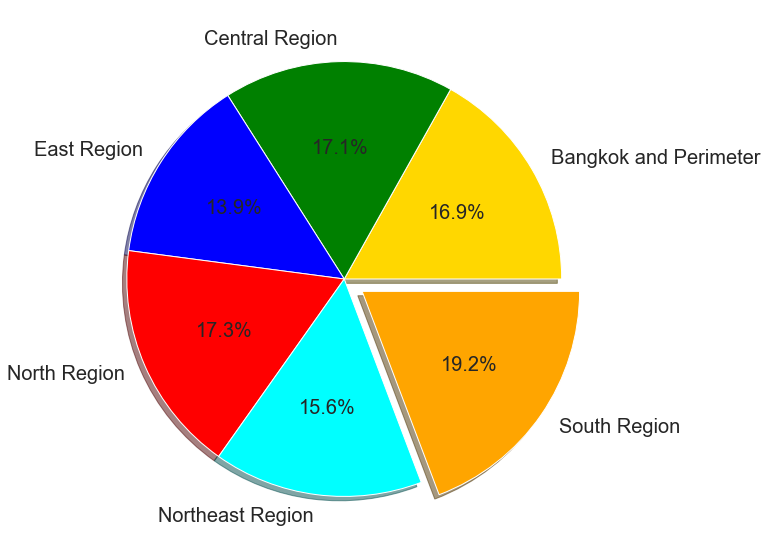

In [1303]:

colors=['gold','green','blue','red','cyan','orange']
explode=(0,0,0,0,0,0.1)#this tel how far the split will go
plt.pie(abs(cc['diff']),explode=explode,labels=cc['AREA_NM'],colors=colors,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 20})#changing d to f%
plt.show()

In [87]:
melt=pd.melt(cc, id_vars="AREA_NM", var_name="year", value_name="netsales")
melt

AREA_NM      year      netsales
0   Bangkok and Perimeter  year2010  3.923174e+06
1          Central Region  year2010  6.122385e+05
2             East Region  year2010  6.432150e+05
3            North Region  year2010  7.439245e+05
4        Northeast Region  year2010  1.254528e+06
5            South Region  year2010  7.076790e+05
6   Bangkok and Perimeter  year2011  3.267023e+06
7          Central Region  year2011  5.280880e+05
8             East Region  year2011  5.645280e+05
9            North Region  year2011  6.085880e+05
10       Northeast Region  year2011  1.068230e+06
11           South Region  year2011  5.629910e+05
12  Bangkok and Perimeter      diff -1.672500e+01
13         Central Region      diff -1.374473e+01
14            East Region      diff -1.223339e+01
15           North Region      diff -1.819224e+01
16       Northeast Region      diff -1.485005e+01
17           South Region      diff -2.044543e+01

In [85]:
b=melt.AREA_NM.unique()
c1=melt[melt.year=='year2010'].netsales.values
c2=melt[melt.year=='year2011'].netsales.values

In [86]:
c1

array([3923174. ,  612238.5,  643215. ,  743924.5, 1254528. ,  707679. ])

In [77]:
b

array(['Bangkok and Perimeter', 'Central Region', 'East Region',
       'North Region', 'Northeast Region', 'South Region'], dtype=object)

In [1339]:
melt[melt.year=='year2010'].net_sales.values

array([5437553. ,  994821. ,  885105. , 1146762.5, 1695202.5, 1058556. ])

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


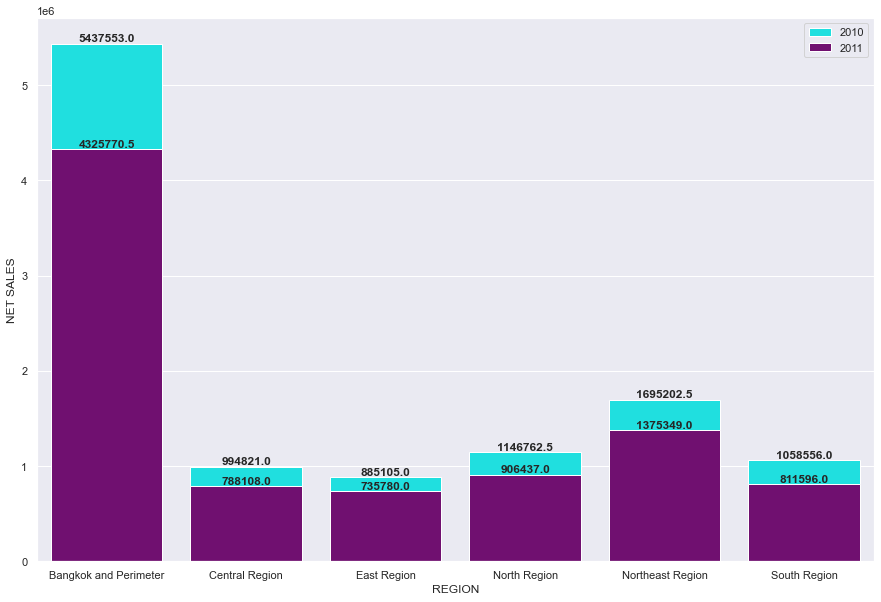

In [1379]:
sns.set(rc={'figure.figsize':(15,10)})
#plt.rcParams['figure.figsize'] = 11.7,8.27
#plt.figure(figsize = (20,50))
#sns.factorplot(x='AREA_NM', y='net_sales', hue='year', data=melt, kind='bar')
bar=sns.barplot(b,melt[melt.year=='year2010'].net_sales.values,color='cyan',label='2010')
bar1=sns.barplot(b,melt[melt.year=='year2011'].net_sales.values,color='purple',label='2011')
plt.ylabel('NET SALES')
plt.xlabel('REGION')
#for i in bar.containers:
#    bar.bar_label(i,)
for i in range(len(b)):
    plt.text(i,c1[i],c1[i],ha='center',va='bottom',weight='bold')
for i in range(len(b)):
    plt.text(i,c2[i],c2[i],ha='center',va='bottom',weight='bold')    

#bar.set_yscale("log")
#plt.ylim(0, 10000000)
#1 finding
plt.legend()

In [34]:
cc

AREA_NM   year2010   year2011       diff
0  Bangkok and Perimeter  3923174.0  3267023.0 -16.725004
1         Central Region   612238.5   528088.0 -13.744725
2            East Region   643215.0   564528.0 -12.233390
3           North Region   743924.5   608588.0 -18.192236
4       Northeast Region  1254528.0  1068230.0 -14.850047
5           South Region   707679.0   562991.0 -20.445428

In [51]:
x1=cc.iloc[:,0].values
y1=cc.iloc[:1,1:3].values
y2=cc.iloc[1:2,1:3].values
y3=cc.iloc[2:3,1:3].values
y4=cc.iloc[3:4,1:3].values
y5=cc.iloc[4:5,1:3].values


In [62]:
cc.year2011

0    3267023.0
1     528088.0
2     564528.0
3     608588.0
4    1068230.0
5     562991.0
Name: year2011, dtype: float64

In [105]:
c2

array([3267023.,  528088.,  564528.,  608588., 1068230.,  562991.])

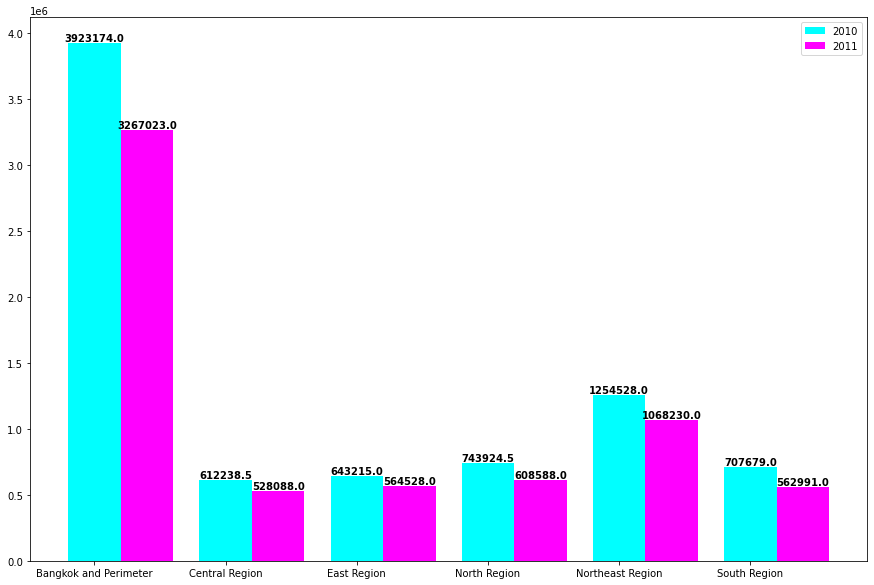

In [103]:
plt.rcParams['figure.figsize']=15,10
fig,ax=plt.subplots()
w=0.4
year2011s=[i+w for i in range(len(x1))]
ax1=ax.bar(x1,cc.year2010,label='2010',color='cyan',width=w)
ax2=ax.bar(year2011s,cc.year2011,label='2011',color='magenta',width=w)

for i in range(len(x1)):
    plt.text(i,c1[i],c1[i],ha='center',va='bottom',weight='bold',fontsize=10)
for i in range(len(x1)):
    plt.text(i+w,c2[i],c2[i],ha='center',va='bottom',weight='bold',fontsize=10)  
#ax.bar_label(ax1,label_type='edge',fontsize=10,fontweight='bold')
#ax.bar_label(ax2,label_type='edge',fontsize=10,fontweight='bold')
#ax.bar_label(ax3,label_type='center',fontsize=15,fontweight='bold')

plt.legend(bbox_to_anchor=((1,1)))#now its correct

In [ ]:
#grouped bar plot for abvoe rep that is stacked bar plot equivalent grouped bar char
#to add extrac bar graph

fig,ax=plt.subplots()
w=0.2
female_start=[i+w for i in range(len(y1))]#u do this so that lowest graph are low then start new bar graph
nfstart=[female_start[i]+w for i in range(len(y2))]#here len(y2) cuz not found shud start after female similarly above we took len(y1)
ax1=ax.bar(x1,y1,label='male',color='red',width=w)
ax2=ax.bar(female_start,y2,label='female',color='green',width=w)
ax3=ax.bar(nfstart,y3,label='not found',color='blue',width=w)


ax.bar_label(ax1,label_type='center',fontsize=15,fontweight='bold')
ax.bar_label(ax2,label_type='center',fontsize=15,fontweight='bold')
ax.bar_label(ax3,label_type='center',fontsize=15,fontweight='bold')

plt.legend(bbox_to_anchor=((0.1,-0.1)))#now its correct

In [33]:
cc

AREA_NM   year2010   year2011       diff
0  Bangkok and Perimeter  3923174.0  3267023.0 -16.725004
1         Central Region   612238.5   528088.0 -13.744725
2            East Region   643215.0   564528.0 -12.233390
3           North Region   743924.5   608588.0 -18.192236
4       Northeast Region  1254528.0  1068230.0 -14.850047
5           South Region   707679.0   562991.0 -20.445428

In [ ]:
label='a','b','c','d'
sizes=[11,21,31,41]
colors=['gold','green','blue','red']
explode=(0.1,0.1,0.1,0.1)#this tel how far the split will go
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct='%1.1f%%',shadow=True)#changing d to f%

<AxesSubplot:>

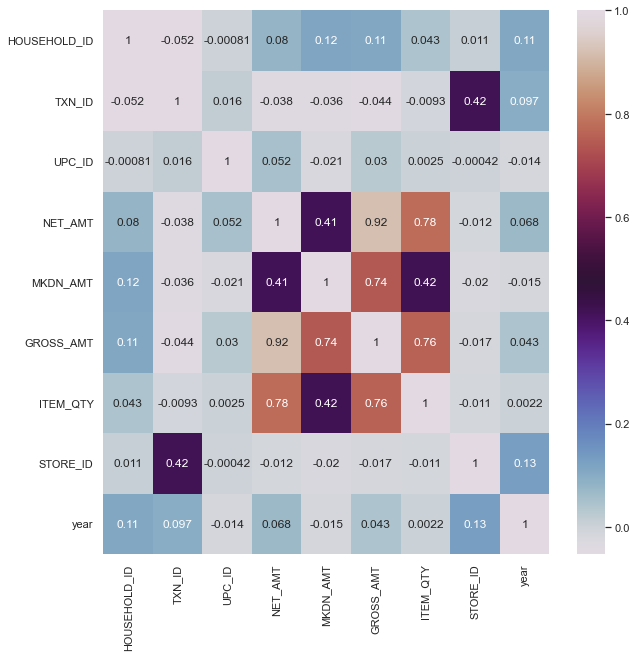

In [556]:
#2 findind
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(tran.corr(),cmap='twilight',annot=True)

In [582]:
tran.groupby('year')['GROSS_AMT','MKDN_AMT','NET_AMT','ITEM_QTY'].sum()

C:\Users\2112161\AppData\Local\Temp\13/ipykernel_30940/3818753623.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tran.groupby('year')['GROSS_AMT','MKDN_AMT','NET_AMT','ITEM_QTY'].sum()


GROSS_AMT   MKDN_AMT     NET_AMT  ITEM_QTY
year                                             
2010  15094032.5  3077820.0  12016212.5    147261
2011  12134504.5  2187507.0   9946997.5    111115

In [1122]:
(15094032.5-12134504.5)/15094032.5

0.1960727194671139

In [573]:
(15094032.5-12016212.5)/15094032.5*100#discount diven almost 20%

20.3909723925664

In [1120]:
3077820.0/15094032.5

0.203909723925664

In [1121]:
2187507.0/12134504.5

0.18027163779122585

In [1119]:
(12134504.5-9946997.5)/12134504.5 *100#here discount given less

18.027163779122585

In [585]:
(147261-111115) /147261*100#24% drop in quantity from 2010 to 2011

24.545534798758666

In [592]:
pd.DatetimeIndex(tran.TXN_DT).month#no month on year can be done as data has only 1 month 

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='TXN_DT', length=222997)

In [829]:
#3
dws=pd.concat([pd.DataFrame(pd.DatetimeIndex(tran.TXN_DT).day),
pd.DataFrame(pd.DatetimeIndex(tran.TXN_DT).year),
tran[['NET_AMT']],
           ],axis=1)

dws.columns=['day','year','netsales']
dws

day  year  netsales
0         1  2010      58.5
1         1  2010     115.0
2         1  2010      32.0
3         1  2010      99.0
4         2  2010      32.0
...     ...   ...       ...
222992   21  2010      57.5
222993   21  2010      99.0
222994   21  2010      79.0
222995   21  2010      79.0
222996   21  2010      79.0

[222997 rows x 3 columns]

In [828]:
#dailysales=pd.DataFrame(dws.groupby(['year','day'])['netsales'].sum())
#dailysales
dailysales=dws.pivot_table(index='day',columns='year',values='netsales',aggfunc='sum')
dailysales.columns=['year2010','year2011']
dailysales['diff']=(dailysales.year2011-dailysales.year2010) /dailysales.year2010 *100
dailysales

year2010  year2011       diff
day                               
1    642183.5  332689.5 -48.194013
2    417235.0  321684.5 -22.900883
3    367774.5  371138.0   0.914555
4    335666.0  354279.5   5.545244
5    327438.5  467003.5  42.623271
6    422608.0  599432.0  41.841139
7    503028.5  342880.5 -31.836765
8    289390.5  307656.5   6.311887
9    234878.5  299102.0  27.343286
10   250278.0  320288.0  27.972894
11   309850.0  332162.0   7.200904
12   494544.5  430361.0 -12.978306
13   589984.0  513408.5 -12.979250
14   644607.0  302978.5 -52.997951
15   406449.5  284774.5 -29.936068
16   353614.0  270457.0 -23.516320
17   359419.0  206463.5 -42.556320
18   310087.5  206322.0 -33.463297
19   313481.0  310961.0  -0.803876
20   408375.5  349071.5 -14.521929
21   503619.0  223911.5 -55.539505
22   304227.0  213656.5 -29.770698
23   292763.5  206272.5 -29.542959
24   294856.0  211588.5 -28.240056
25   303949.0  224632.0 -26.095496
26   308571.5  308366.5  -0.066435
27   431962.5  402949.0  -6.716671
28   511312.0  282093.0 -44.829576
29   330325.5  256520.5 -22.343113
30   335797.0  284766.0 -15.196979
31   417936.5  409128.0  -2.107617

In [844]:
new=pd.concat([pd.DataFrame(dailysales.index),
pd.DataFrame(dailysales.year2010.values),
pd.DataFrame(dailysales.year2011.values),
pd.DataFrame(dailysales['diff'].values)],axis=1)
new.columns=['day','year2010','year2011','diff']
new

day  year2010  year2011       diff
0     1  642183.5  332689.5 -48.194013
1     2  417235.0  321684.5 -22.900883
2     3  367774.5  371138.0   0.914555
3     4  335666.0  354279.5   5.545244
4     5  327438.5  467003.5  42.623271
5     6  422608.0  599432.0  41.841139
6     7  503028.5  342880.5 -31.836765
7     8  289390.5  307656.5   6.311887
8     9  234878.5  299102.0  27.343286
9    10  250278.0  320288.0  27.972894
10   11  309850.0  332162.0   7.200904
11   12  494544.5  430361.0 -12.978306
12   13  589984.0  513408.5 -12.979250
13   14  644607.0  302978.5 -52.997951
14   15  406449.5  284774.5 -29.936068
15   16  353614.0  270457.0 -23.516320
16   17  359419.0  206463.5 -42.556320
17   18  310087.5  206322.0 -33.463297
18   19  313481.0  310961.0  -0.803876
19   20  408375.5  349071.5 -14.521929
20   21  503619.0  223911.5 -55.539505
21   22  304227.0  213656.5 -29.770698
22   23  292763.5  206272.5 -29.542959
23   24  294856.0  211588.5 -28.240056
24   25  303949.0  224632.0 -26.095496
25   26  308571.5  308366.5  -0.066435
26   27  431962.5  402949.0  -6.716671
27   28  511312.0  282093.0 -44.829576
28   29  330325.5  256520.5 -22.343113
29   30  335797.0  284766.0 -15.196979
30   31  417936.5  409128.0  -2.107617

In [1150]:
new['diff'].mean()

-13.786480764253165

In [849]:
new1=pd.concat([pd.DataFrame(dailysales.index),
pd.DataFrame(dailysales.year2010.values),
pd.DataFrame(dailysales.year2011.values)],axis=1)
new1.columns=['day','year2010','year2011']
new1

day  year2010  year2011
0     1  642183.5  332689.5
1     2  417235.0  321684.5
2     3  367774.5  371138.0
3     4  335666.0  354279.5
4     5  327438.5  467003.5
5     6  422608.0  599432.0
6     7  503028.5  342880.5
7     8  289390.5  307656.5
8     9  234878.5  299102.0
9    10  250278.0  320288.0
10   11  309850.0  332162.0
11   12  494544.5  430361.0
12   13  589984.0  513408.5
13   14  644607.0  302978.5
14   15  406449.5  284774.5
15   16  353614.0  270457.0
16   17  359419.0  206463.5
17   18  310087.5  206322.0
18   19  313481.0  310961.0
19   20  408375.5  349071.5
20   21  503619.0  223911.5
21   22  304227.0  213656.5
22   23  292763.5  206272.5
23   24  294856.0  211588.5
24   25  303949.0  224632.0
25   26  308571.5  308366.5
26   27  431962.5  402949.0
27   28  511312.0  282093.0
28   29  330325.5  256520.5
29   30  335797.0  284766.0
30   31  417936.5  409128.0

In [850]:
#negprodmelt=pd.melt(negprod1, id_vars="UPC_ID", var_name="year", value_name="quantity")
dailysalesmelt=pd.melt(new1, id_vars='day', var_name="year", value_name="sales")
dailysalesmelt

day      year     sales
0     1  year2010  642183.5
1     2  year2010  417235.0
2     3  year2010  367774.5
3     4  year2010  335666.0
4     5  year2010  327438.5
..  ...       ...       ...
57   27  year2011  402949.0
58   28  year2011  282093.0
59   29  year2011  256520.5
60   30  year2011  284766.0
61   31  year2011  409128.0

[62 rows x 3 columns]

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'SALES')

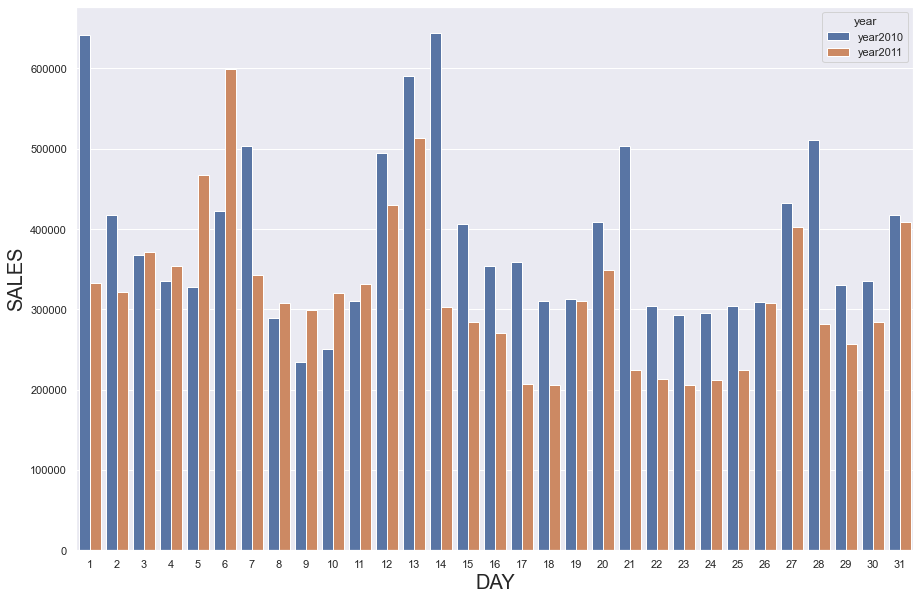

In [1124]:
sns.barplot(dailysalesmelt.day,dailysalesmelt.sales,hue=dailysalesmelt.year)
plt.xlabel('DAY',fontsize=20)
plt.ylabel('SALES',fontsize=20)

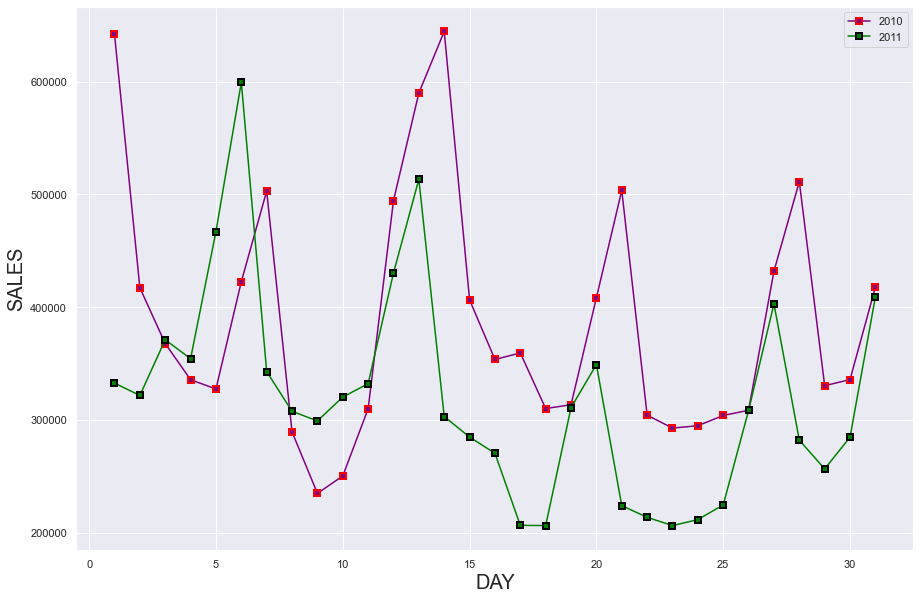

In [1149]:
plt.plot(dailysales.index,dailysales.year2010,label='2010',marker='s',mew=2,mec='red',color='purple')
plt.plot(dailysales.index,dailysales.year2011,label='2011',marker='s',mew=2,mec='black',color='green')
plt.xlabel('DAY',fontsize=20)
plt.ylabel('SALES',fontsize=20)
plt.legend()

<AxesSubplot:>

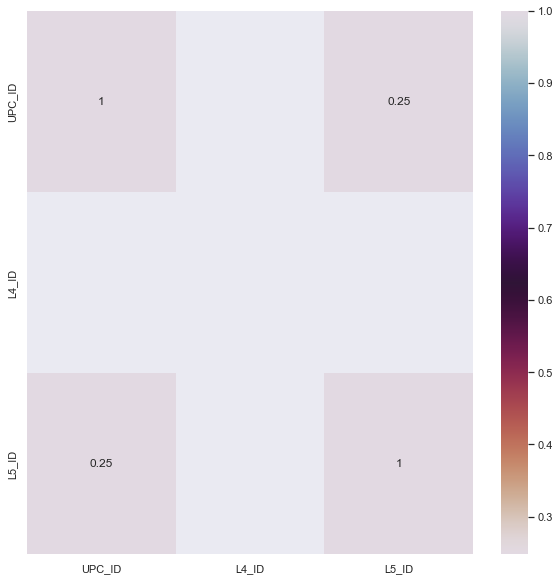

In [660]:
sns.heatmap(prod.corr(),cmap='twilight_r',annot=True)

In [667]:
#3 products sold 
pd.DataFrame(tran.groupby(['UPC_ID','year'])['NET_AMT'].sum())

NET_AMT
UPC_ID        year          
63174000702   2011     195.0
7038513912056 2010   34810.0
              2011   53280.0
8850002017863 2011     416.0
8850002017887 2010   66780.0
...                      ...
9300647000342 2011  270914.0
9300647788691 2010   47541.0
              2011   60102.0
9300647788707 2010   30789.0
              2011   46135.0

[147 rows x 1 columns]

In [753]:
prodsales=tran.pivot_table(index='UPC_ID',columns='year',values='NET_AMT',aggfunc='sum').fillna(0)
prodsales.columns=['year2010','year2011']
prodsales['diff']=(prodsales.year2011-prodsales.year2010)/(prodsales.year2010) * 100
prodsales1=prodsales[(prodsales['diff']>-100) &(prodsales['diff']<=0)]#these are the products that were in the loss range
prodsales1

year2010  year2011       diff
UPC_ID                                       
8850002017887    66780.0   52032.0 -22.084456
8850002017924   123576.0   83381.0 -32.526542
8850002017962    69553.0   55999.0 -19.487297
8850002018006    88368.0   68126.0 -22.906482
8850002020511    95241.0   94224.0  -1.067817
8850002020535    78578.5      78.0 -99.900736
8850002020559   153591.0  122186.0 -20.447162
8850002021990    40704.0   28656.0 -29.599057
8850002022034    85103.0   40985.0 -51.840711
8850002022447    38584.0   36048.0  -6.572673
8850002022485    61806.0   41602.0 -32.689383
8850006301135   208876.0   47087.0 -77.456960
8850006303221   792117.0  216172.0 -72.709587
8850006303283   106425.0     642.0 -99.396758
8850006303399    37024.0     108.0 -99.708297
8850006330043    57584.0    2780.0 -95.172270
8850007811060  1524556.0  558904.0 -63.339884
8850007811138   106777.5    2334.0 -97.814146
8850007811152   309773.0   88510.0 -71.427465
8850007811176   368318.0  331265.0 -10.060057
8850007811213   714100.0   12343.5 -98.271461
8850007811237  1317458.5  355462.0 -73.019112
8850007811312   271775.0   18460.5 -93.207433
8850007811459   121742.5    1519.5 -98.751874
8850007811473   363867.0  126982.5 -65.101947
8850007811619   280809.0  108324.0 -61.424313
8850007811671   228045.0  178500.0 -21.725975
8850007811695   715551.0  562584.0 -21.377512
8852027401160    77263.0      49.0 -99.936580
8852294555252    29811.0      27.0 -99.909429
8852294562250   131376.0  125616.0  -4.384362
9300647000342   322525.0  270914.0 -16.002170

No handles with labels found to put in legend.


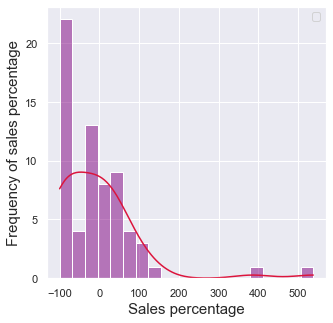

In [1183]:
ax=sns.histplot(prodsales['diff'],bins=20,kde=True,palette ='twilight',color='purple')
ax.lines[0].set_color('crimson')
plt.rcParams['figure.figsize']=(5,5)
plt.xlabel('Sales percentage',fontsize=15)
plt.ylabel('Frequency of sales percentage',fontsize=15)
plt.legend()

<AxesSubplot:ylabel='Frequency'>

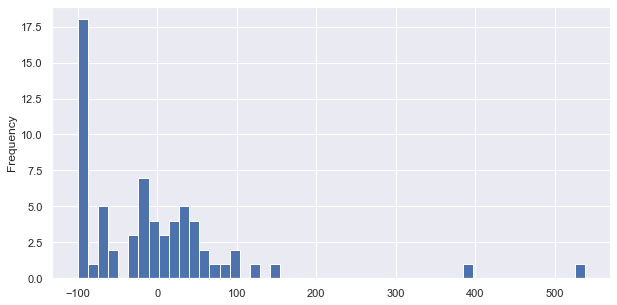

In [929]:
inf=list(prodsales[(prodsales['diff']==np.inf)].index)
prodsales.drop(inf,inplace=True)
prodsales['diff'].plot(kind='hist',bins=50)


In [1191]:
prodsales['diff'].mean()

-6.503396881038101

In [930]:
len(prodsales[prodsales['diff']>0])#values >0

26

In [1187]:
len(prodsales[prodsales['diff']<=0])#almost twice of the products >0 have given sales in neg

40

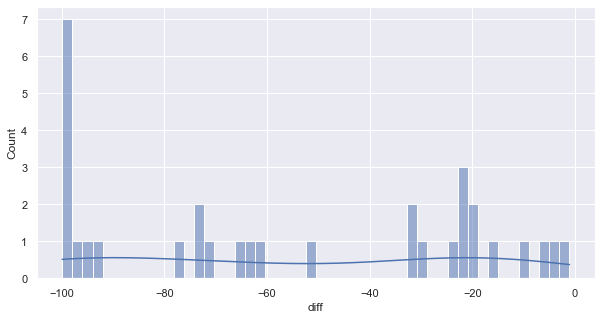

In [943]:
#prodsales1['diff'].plot(kind='hist',bins=90)
sns.histplot(prodsales1['diff'],kde=True,bins=50)
plt.rcParams['figure.figsize']=(10,5)

In [747]:
prodsales[(prodsales['diff']==-100)]#these are the products that were not at all sold

year2010  year2011   diff
UPC_ID                                  
8850002017900   66924.0       0.0 -100.0
8850002017986   59702.5       0.0 -100.0
8850002022461   46572.5       0.0 -100.0
8850007811534      60.0       0.0 -100.0
8852294552756     152.0       0.0 -100.0
8852294560256   16886.0       0.0 -100.0
8852294563509      76.0       0.0 -100.0
8852294565251      24.0       0.0 -100.0

In [928]:
prod_qty=tran.pivot_table(index='UPC_ID',columns='year',values='ITEM_QTY',aggfunc='sum').fillna(0)
prod_qty.columns=['year2010','year2011']
prod_qty['diff']=(prod_qty.year2011-prod_qty.year2010)/(prod_qty.year2010) * 100
prod_qty[(prod_qty['diff']<=0)& (prod_qty['diff']>-100)]#products that were sold less

year2010  year2011       diff
UPC_ID                                      
8850002017887    1652.0    1084.0 -34.382567
8850002017924    1164.0     769.0 -33.934708
8850002017962    1845.0    1167.0 -36.747967
8850002018006     832.0     677.0 -18.629808
8850002020535    1342.0       1.0 -99.925484
8850002020559    1449.0    1111.0 -23.326432
8850002021990     768.0     597.0 -22.265625
8850002022034     797.0     405.0 -49.184442
8850002022485     584.0     401.0 -31.335616
8850006301135    2110.0    1573.0 -25.450237
8850006303221   13051.0    2204.0 -83.112405
8850006303283    1075.0       8.0 -99.255814
8850006303399    1157.0      18.0 -98.444252
8850006330043     976.0     207.0 -78.790984
8850007811060   11228.0    3803.0 -66.129320
8850007811138    1857.0      41.0 -97.792138
8850007811152    4069.0     892.0 -78.078152
8850007811176    3019.0    2957.0  -2.053660
8850007811213   12417.0     215.0 -98.268503
8850007811237   17245.0    3588.0 -79.193969
8850007811312    3542.0     538.0 -84.810841
8850007811459    2206.0      27.0 -98.776065
8850007811473    4724.0    1322.0 -72.015241
8850007811619    3608.0    1130.0 -68.680710
8850007811671    1983.0    1500.0 -24.357035
8850007811695    5223.0    4230.0 -19.012062
8852027401160     969.0       1.0 -99.896801
8852294555252    1190.0       1.0 -99.915966
8852294562250    2737.0    2617.0  -4.384362
9300647000342    3395.0    2847.0 -16.141384

In [781]:
prod_qty[(prod_qty['diff']<=0)& (prod_qty['diff']>-100)]['diff'].mean()

-58.14308503737981

In [710]:
prod_qty[prod_qty['diff']==-100]#same as above not item sold

year2010  year2011   diff
UPC_ID                                  
8850002017900    1143.0       0.0 -100.0
8850002017986    1020.0       0.0 -100.0
8850002022461     796.0       0.0 -100.0
8850007811534       1.0       0.0 -100.0
8852294552756       2.0       0.0 -100.0
8852294560256     614.0       0.0 -100.0
8852294563509       4.0       0.0 -100.0
8852294565251       1.0       0.0 -100.0

In [1197]:
zeroprod=prod_qty[prod_qty['diff']==-100]
pd.merge(zeroprod,prod,how='inner',on='UPC_ID')['UPC_DESCRIPTION']

0        SYSTEMA 500ML.GREEN FOREST
1      SYSTEMA500ML.BLUE CARRIBBEAN
2       SYSTEMA MW 500 ML. PARADISE
3      LISTERINE250BRIGHT&CLEAN(MP)
4         MYBACIN  MOUTHWASH 750 ML
5                 MYCEPTIC250ML.(P)
6          MYSEPTIC 500ML.GREEN TEA
7    MYCEPTIC 250ML.FRESH ORANGE(P)
Name: UPC_DESCRIPTION, dtype: object

In [734]:
negprod=prod_qty[(prod_qty['diff']<=0)& (prod_qty['diff']>-100)]
negprod1=pd.concat([pd.DataFrame(negprod.index),
 pd.DataFrame(negprod.year2010.values),
 pd.DataFrame(negprod.year2011.values)],axis=1)
negprod1.columns=['UPC_ID','year2010','year2011']
negprod1

UPC_ID  year2010  year2011
0   8850002017887    1652.0    1084.0
1   8850002017924    1164.0     769.0
2   8850002017962    1845.0    1167.0
3   8850002018006     832.0     677.0
4   8850002020535    1342.0       1.0
5   8850002020559    1449.0    1111.0
6   8850002021990     768.0     597.0
7   8850002022034     797.0     405.0
8   8850002022485     584.0     401.0
9   8850006301135    2110.0    1573.0
10  8850006303221   13051.0    2204.0
11  8850006303283    1075.0       8.0
12  8850006303399    1157.0      18.0
13  8850006330043     976.0     207.0
14  8850007811060   11228.0    3803.0
15  8850007811138    1857.0      41.0
16  8850007811152    4069.0     892.0
17  8850007811176    3019.0    2957.0
18  8850007811213   12417.0     215.0
19  8850007811237   17245.0    3588.0
20  8850007811312    3542.0     538.0
21  8850007811459    2206.0      27.0
22  8850007811473    4724.0    1322.0
23  8850007811619    3608.0    1130.0
24  8850007811671    1983.0    1500.0
25  8850007811695    5223.0    4230.0
26  8852027401160     969.0       1.0
27  8852294555252    1190.0       1.0
28  8852294562250    2737.0    2617.0
29  9300647000342    3395.0    2847.0

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Qutantitysold')

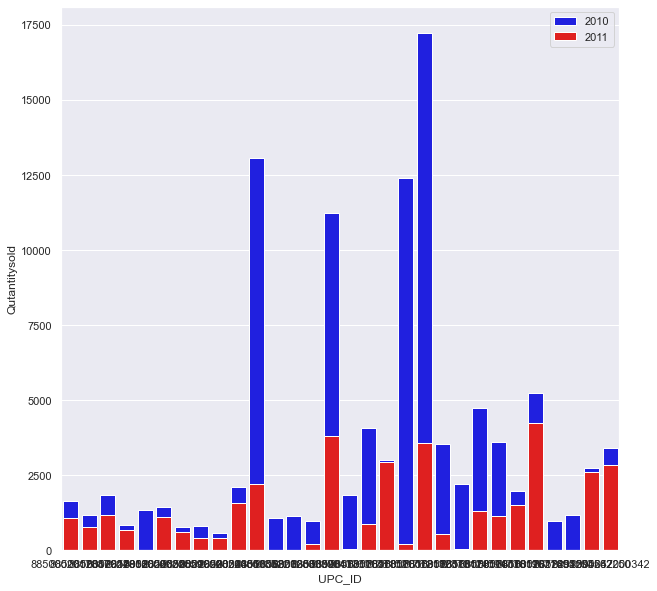

In [783]:
sns.barplot(negprod1.UPC_ID,negprod1.year2010,color='blue',label='2010')
sns.barplot(negprod1.UPC_ID,negprod1.year2011,color='red',label='2011')
plt.legend()
plt.ylabel('Qutantitysold')

In [736]:
negprodmelt=pd.melt(negprod1, id_vars="UPC_ID", var_name="year", value_name="quantity")
negprodmelt

UPC_ID      year  quantity
0   8850002017887  year2010    1652.0
1   8850002017924  year2010    1164.0
2   8850002017962  year2010    1845.0
3   8850002018006  year2010     832.0
4   8850002020535  year2010    1342.0
5   8850002020559  year2010    1449.0
6   8850002021990  year2010     768.0
7   8850002022034  year2010     797.0
8   8850002022485  year2010     584.0
9   8850006301135  year2010    2110.0
10  8850006303221  year2010   13051.0
11  8850006303283  year2010    1075.0
12  8850006303399  year2010    1157.0
13  8850006330043  year2010     976.0
14  8850007811060  year2010   11228.0
15  8850007811138  year2010    1857.0
16  8850007811152  year2010    4069.0
17  8850007811176  year2010    3019.0
18  8850007811213  year2010   12417.0
19  8850007811237  year2010   17245.0
20  8850007811312  year2010    3542.0
21  8850007811459  year2010    2206.0
22  8850007811473  year2010    4724.0
23  8850007811619  year2010    3608.0
24  8850007811671  year2010    1983.0
25  8850007811695  year2010    5223.0
26  8852027401160  year2010     969.0
27  8852294555252  year2010    1190.0
28  8852294562250  year2010    2737.0
29  9300647000342  year2010    3395.0
30  8850002017887  year2011    1084.0
31  8850002017924  year2011     769.0
32  8850002017962  year2011    1167.0
33  8850002018006  year2011     677.0
34  8850002020535  year2011       1.0
35  8850002020559  year2011    1111.0
36  8850002021990  year2011     597.0
37  8850002022034  year2011     405.0
38  8850002022485  year2011     401.0
39  8850006301135  year2011    1573.0
40  8850006303221  year2011    2204.0
41  8850006303283  year2011       8.0
42  8850006303399  year2011      18.0
43  8850006330043  year2011     207.0
44  8850007811060  year2011    3803.0
45  8850007811138  year2011      41.0
46  8850007811152  year2011     892.0
47  8850007811176  year2011    2957.0
48  8850007811213  year2011     215.0
49  8850007811237  year2011    3588.0
50  8850007811312  year2011     538.0
51  8850007811459  year2011      27.0
52  8850007811473  year2011    1322.0
53  8850007811619  year2011    1130.0
54  8850007811671  year2011    1500.0
55  8850007811695  year2011    4230.0
56  8852027401160  year2011       1.0
57  8852294555252  year2011       1.0
58  8852294562250  year2011    2617.0
59  9300647000342  year2011    2847.0

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UPC_ID', ylabel='quantity'>

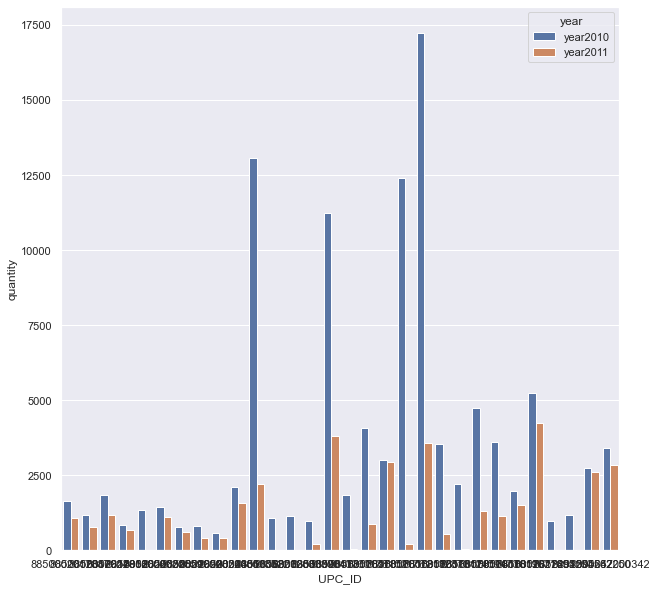

In [778]:
sns.barplot(negprodmelt.UPC_ID,negprodmelt.quantity,hue=negprodmelt.year)#u can see threr drop in quanty

In [954]:
pd.merge(negprod1,prod,how='inner',on='UPC_ID')

UPC_ID  year2010  year2011                   UPC_DESCRIPTION  \
0   8850002017887    1652.0    1084.0     SYSTEMA 250ML.GREEN FOREST(P)   
1   8850002017924    1164.0     769.0         SYSTEMA750ML.GREEN FOREST   
2   8850002017962    1845.0    1167.0    SYSTEMA250ML.BLUE CARIBBEAN(P)   
3   8850002018006     832.0     677.0        SYSTEMA 750ML.BLUECARIBEAN   
4   8850002020535    1342.0       1.0         SYSTEMA 500ML.CHERRYBOSUM   
5   8850002020559    1449.0    1111.0         SYSTEMA 750ML.CHERRYBOSUM   
6   8850002021990     768.0     597.0        SYSTEMA MW 250 ML. FANTASY   
7   8850002022034     797.0     405.0        SYSTEMA MW 750 ML. FANTASY   
8   8850002022485     584.0     401.0       SYSTEMA MW 750 ML. PARADISE   
9   8850006301135    2110.0    1573.0     COLGATE PLAX 500ML.PEPPERMINT   
10  8850006303221   13051.0    2204.0  COLGATE PLAX 500ML.COMPLETE CARE   
11  8850006303283    1075.0       8.0      COLGATE PLAX 750ML.FRESHMINT   
12  8850006303399    1157.0      18.0      COLGATE PLAX 100ML.FRESHMINT   
13  8850006330043     976.0     207.0           COLGATE FLOS 20YARDS(P)   
14  8850007811060   11228.0    3803.0        LISTERINE TOTAL CARE 750ML   
15  8850007811138    1857.0      41.0          LISTERINE ORIGINAL 250ML   
16  8850007811152    4069.0     892.0          LISTERINE ORIGINAL 500ML   
17  8850007811176    3019.0    2957.0          LISTERINE ORIGINAL 750ML   
18  8850007811213   12417.0     215.0         LISTERINE COOL MINT 250ML   
19  8850007811237   17245.0    3588.0         LISTERINE COOL MINT 500ML   
20  8850007811312    3542.0     538.0         LISTERINE500FRESHBURST(M)   
21  8850007811459    2206.0      27.0      LISTERINE FRESH CITRUS 250ML   
22  8850007811473    4724.0    1322.0       LISTERINE500FRESH CITRUS(P)   
23  8850007811619    3608.0    1130.0                LISTERINE500ML.(P)   
24  8850007811671    1983.0    1500.0            LISTERINE TARTAR 500ML   
25  8850007811695    5223.0    4230.0            LISTERINE TARTAR 750ML   
26  8852027401160     969.0       1.0       FLUOCARIL MOUTHWASH 500 ML.   
27  8852294555252    1190.0       1.0                 MYCEPTIC250ML.(P)   
28  8852294562250    2737.0    2617.0           MYSEPTIC JUNIOR250M.(P)   
29  9300647000342    3395.0    2847.0   ORAL-B ESSENTIALFLOSS 50 M.(MP)   

      L4_ID          CATE      L5_ID      SUB_CATE  \
0   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
1   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
2   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
3   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
4   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
5   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
6   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
7   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
8   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
9   4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
10  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
11  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
12  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
13  4602003  MOUTH&DENTAL  460200301  DENTAL FLOSS   
14  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
15  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
16  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
17  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
18  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
19  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
20  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
21  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
22  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
23  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
24  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
25  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
26  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
27  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
28  4602003  MOUTH&DENTAL  460200302     MOUTHWASH   
29  4602003  MOUTH&DENTAL  460200301  DENTAL FLOSS   

          

In [961]:
#len(negprod)
negprodlist=pd.merge(negprod1,prod,how='inner',on='UPC_ID')[['UPC_ID','year2010','year2011','UPC_DESCRIPTION']]#list of prodcuts gga neg sales
negprodlist

UPC_ID  year2010  year2011                   UPC_DESCRIPTION
0   8850002017887    1652.0    1084.0     SYSTEMA 250ML.GREEN FOREST(P)
1   8850002017924    1164.0     769.0         SYSTEMA750ML.GREEN FOREST
2   8850002017962    1845.0    1167.0    SYSTEMA250ML.BLUE CARIBBEAN(P)
3   8850002018006     832.0     677.0        SYSTEMA 750ML.BLUECARIBEAN
4   8850002020535    1342.0       1.0         SYSTEMA 500ML.CHERRYBOSUM
5   8850002020559    1449.0    1111.0         SYSTEMA 750ML.CHERRYBOSUM
6   8850002021990     768.0     597.0        SYSTEMA MW 250 ML. FANTASY
7   8850002022034     797.0     405.0        SYSTEMA MW 750 ML. FANTASY
8   8850002022485     584.0     401.0       SYSTEMA MW 750 ML. PARADISE
9   8850006301135    2110.0    1573.0     COLGATE PLAX 500ML.PEPPERMINT
10  8850006303221   13051.0    2204.0  COLGATE PLAX 500ML.COMPLETE CARE
11  8850006303283    1075.0       8.0      COLGATE PLAX 750ML.FRESHMINT
12  8850006303399    1157.0      18.0      COLGATE PLAX 100ML.FRESHMINT
13  8850006330043     976.0     207.0           COLGATE FLOS 20YARDS(P)
14  8850007811060   11228.0    3803.0        LISTERINE TOTAL CARE 750ML
15  8850007811138    1857.0      41.0          LISTERINE ORIGINAL 250ML
16  8850007811152    4069.0     892.0          LISTERINE ORIGINAL 500ML
17  8850007811176    3019.0    2957.0          LISTERINE ORIGINAL 750ML
18  8850007811213   12417.0     215.0         LISTERINE COOL MINT 250ML
19  8850007811237   17245.0    3588.0         LISTERINE COOL MINT 500ML
20  8850007811312    3542.0     538.0         LISTERINE500FRESHBURST(M)
21  8850007811459    2206.0      27.0      LISTERINE FRESH CITRUS 250ML
22  8850007811473    4724.0    1322.0       LISTERINE500FRESH CITRUS(P)
23  8850007811619    3608.0    1130.0                LISTERINE500ML.(P)
24  8850007811671    1983.0    1500.0            LISTERINE TARTAR 500ML
25  8850007811695    5223.0    4230.0            LISTERINE TARTAR 750ML
26  8852027401160     969.0       1.0       FLUOCARIL MOUTHWASH 500 ML.
27  8852294555252    1190.0       1.0                 MYCEPTIC250ML.(P)
28  8852294562250    2737.0    2617.0           MYSEPTIC JUNIOR250M.(P)
29  9300647000342    3395.0    2847.0   ORAL-B ESSENTIALFLOSS 50 M.(MP)

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


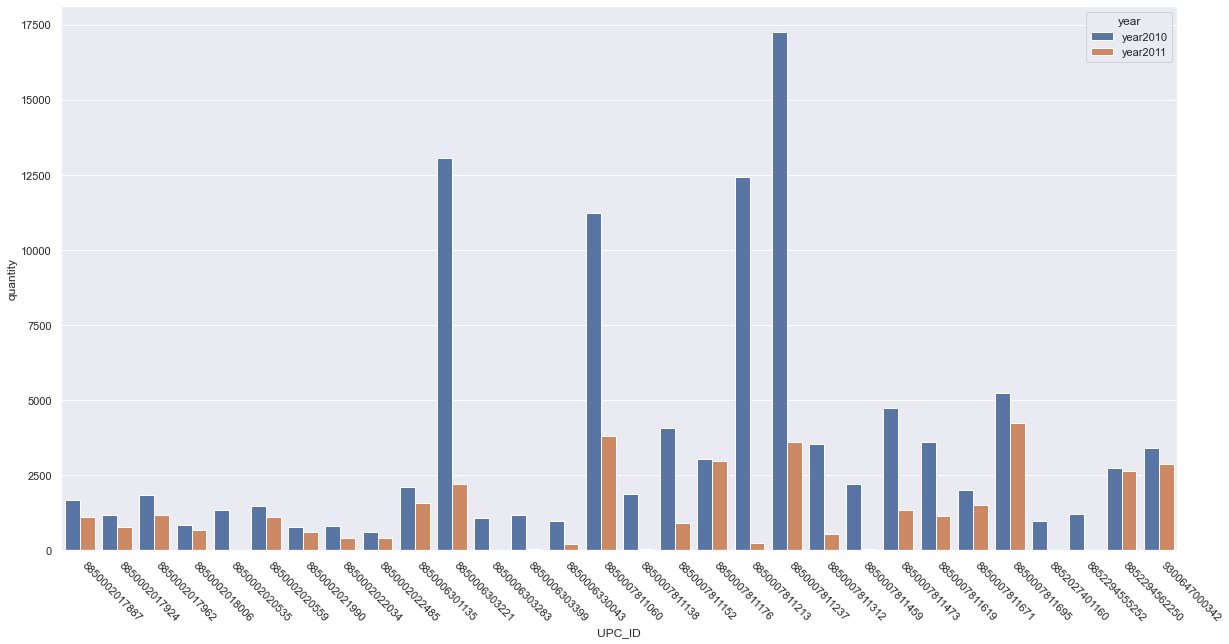

In [989]:
sns.barplot(negprodmelt.UPC_ID,negprodmelt.quantity,hue=negprodmelt.year)
plt.xticks(rotation=-45,ha='left')
plt.show()
plt.rcParams['figure.figsize']=30,10

In [1207]:
dws1=pd.concat([pd.DataFrame(pd.DatetimeIndex(tran.TXN_DT).day),
pd.DataFrame(pd.DatetimeIndex(tran.TXN_DT).year),
tran[['ITEM_QTY']],
           ],axis=1)

dws1.columns=['DAY','YEAR','QUANTITY_SOLD']
dws1

DAY  YEAR  QUANTITY_SOLD
0         1  2010              1
1         1  2010              1
2         1  2010              1
3         1  2010              1
4         2  2010              1
...     ...   ...            ...
222992   21  2010              1
222993   21  2010              1
222994   21  2010              1
222995   21  2010              1
222996   21  2010              1

[222997 rows x 3 columns]

In [1233]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(dws1.DAY,dws1.QUANTITY_SOLD,hue=dws1.YEAR,palette='twillight')
#sns.barplot(dws1.DAY.UPC_ID,negprod1.year2010,color='blue',label='2010')
#sns.barplot(dws1.DAY.UPC_ID,negprod1.year2011,color='red',label='2011')
#plt.legend()
#plt.ylabel('Qutantitysold')

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: twillight is not a valid palette name

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAY', ylabel='QUANTITY_SOLD'>

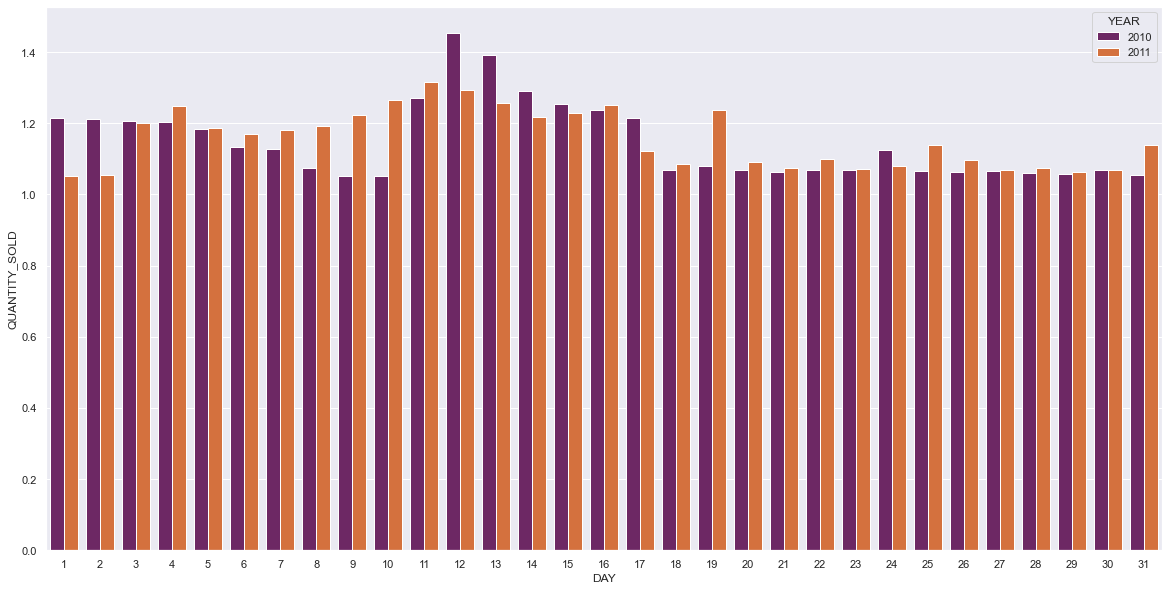

In [1250]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(dws1.DAY,dws1.QUANTITY_SOLD,hue=dws1.YEAR,palette='inferno',ci=None)

In [1253]:
tran['day']=pd.DatetimeIndex(tran.TXN_DT).day
tran

HOUSEHOLD_ID        TXN_ID     TXN_DT    TXN_TM         UPC_ID  \
0          -145120321024  145120321024 2010-03-01  12:13:00  8850002022461   
1          -108219184928  108219184928 2010-03-01  20:27:00  8850007811671   
2          -134208122317  134208122317 2010-03-01  13:14:00  8850006303405   
3          -114124194973  114124194973 2010-03-01  21:21:00  8850006303283   
4       7711113700122360  152104353152 2010-03-02  13:40:00  8850006303405   
...                  ...           ...        ...       ...            ...   
222992  7711114000256410  140106216297 2010-03-21  12:14:00  8850007811213   
222993  7711112200138350  122122157135 2010-03-21  20:36:00  8850006303290   
222994     -131111301361  131111301361 2010-03-21  13:14:00  8850007811473   
222995     -126315146456  126315146456 2010-03-21  12:42:00  8850007811237   
222996     -104113022368  104113022368 2010-03-21  15:34:00  8850007811237   

        NET_AMT  MKDN_AMT  GROSS_AMT  ITEM_QTY  STORE_ID  year  day  
0          58.5      36.5       95.0         1     11145  2010    1  
1         115.0       8.0      123.0         1     11108  2010    1  
2          32.0       0.0       32.0         1     11134  2010    1  
3          99.0      17.0      116.0         1     11114  2010    1  
4          32.0       0.0       32.0         1     11152  2010    2  
...         ...       ...        ...       ...       ...   ...  ...  
222992     57.5       0.0       57.5         1     11140  2010   21  
222993     99.0      17.0      116.0         1     11122  2010   21  
222994     79.0      28.0      107.0         1     11131  2010   21  
222995     79.0      28.0      107.0         1     11126  2010   21  
222996     79.0      28.0      107.0         1     11104  2010   21  

[222997 rows x 12 columns]

In [1264]:
daywiseqty=tran.pivot_table(index='day',columns='year',values='ITEM_QTY',aggfunc='sum')
daywiseqty.columns=['year2010','year2011']
daywiseqty

year2010  year2011
day                    
1        8649      3418
2        5738      3307
3        4937      4067
4        4384      3962
5        4005      5142
6        5206      6469
7        6101      3711
8        3343      3318
9        2620      3416
10       2788      3703
11       3820      3958
12       6527      5087
13       7622      5907
14       8154      3471
15       5275      3335
16       4585      3262
17       4579      2362
18       3666      2315
19       3801      3705
20       4834      3874
21       6020      2484
22       3605      2390
23       3469      2246
24       3517      2342
25       3561      2668
26       3572      3375
27       4863      4249
28       5705      3027
29       3744      2725
30       3802      3042
31       4769      4778

In [1257]:
pd.DataFrame(tran.groupby(['day','year'])['ITEM_QTY'].sum())

ITEM_QTY
day year          
1   2010      8649
    2011      3418
2   2010      5738
    2011      3307
3   2010      4937
...            ...
29  2011      2725
30  2010      3802
    2011      3042
31  2010      4769
    2011      4778

[62 rows x 1 columns]

In [1276]:
daywiseq=pd.concat([pd.DataFrame(daywiseqty.index),
pd.DataFrame(daywiseqty['year2010'].values),
pd.DataFrame(daywiseqty['year2011'].values)
],axis=1)
daywiseq.columns=['day','year2010','year2011']
daywiseq['diff']=(daywiseq['year2011']-daywiseq['year2010'])/daywiseq['year2010']
daywiseq['diff'].mean()

-0.20132804534015344

In [2]:
a = [1, 2, 3]
b = [3, 6, 8, 10]
for i in [a,b]:
    print(i)

[1, 2, 3]
[3, 6, 8, 10]


In [14]:
a = [1, 2, 3]
b = [3, 6, 8, 10]
[i for j in [a,b] for i in j]# for i in j]

[1, 2, 3, 3, 6, 8, 10]

In [101]:
a = [1, 2, 3]
b = [3, 6, 8, 10]
set([j for i in [a,b] for j in i])

{1, 2, 3, 6, 8, 10}

In [103]:
a = [1, 2, 3]
b = [3, 6, 8, 10]
dict([j for i in [a,b] for j in i])

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [19]:
c=[a,b]
for i in c:
    for j in i:
        print(j)

1
2
3
3
6
8
10


In [29]:
[i for i in a if i not in b]

[1, 2]

In [39]:
x=int(input())
for i in range(0,x):
    print(b[(-1*(i+1))])
    
b

2
10
8


[3, 6, 8, 10]

In [44]:
random.sample([i for j in [a,b] for i in j],1) 

[10]

In [4]:
list_of_tups = [(1,2),(3,4),(5,)]
dict(list_of_tups)

ValueError: dictionary update sequence element #2 has length 1; 2 is required

In [8]:
list_of_tups = [(1,2),(3,4),(5,3)]
dict(list_of_tups)

{1: 2, 3: 4, 5: 3}

In [48]:
dnew={}
d=dict(list_of_tups)
for i in d:
    dnew[i]=d[i]+10
    
dnew

{1: 12, 3: 14, 5: 16}

In [10]:
d=dict(list_of_tups)
print(d)
for i in d:
    d[i]=d[i]+10
    
print(d)

{1: 2, 3: 4, 5: 3}
{1: 12, 3: 14, 5: 13}


In [14]:
{ i:j for (i,j) in zip(a,b) }

{1: 3, 2: 6, 3: 8}

In [13]:
set(list(np.arange(2))+list(np.arange(4)))

{0, 1, 2, 3}

In [15]:
print(a)
print(b)

[1, 2, 3]
[3, 6, 8, 10]


In [6]:
a=np.arange(1,11)
[i for i in a if i%2==0]

[2, 4, 6, 8, 10]

In [7]:
[i if i%2==0 else 'odd' for i in a ]

['odd', 2, 'odd', 4, 'odd', 6, 'odd', 8, 'odd', 10]

In [73]:
{ i:d[i]+20 for i in d  }

{1: 22, 3: 24, 5: 26}

In [99]:
class a:
    def __init__(self,x,y):
        self.a=x
        self.b=y
    def dis(self):
        print( self.a,self.b)
a1=a(1,2)
a2=a(3,4)
a1.dis()
a2.dis()

1 2
3 4


In [90]:
class zoominfo:
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def concat(self):  
        self.c=self.x+self.y
        print(self.c)
        
z=zoominfo(a,b)
z.concat()

[1, 2, 3, 3, 6, 8, 10]


In [49]:
def leastpos(a):
    for i in range(min(a),max(a)+1):
        if i not in a and i>0:
            print('least positive missing element is ',i)
            break
        else:
            continue
            
a=[]
s=int(input('enter size of list'))
for i in range(s):
    print('enter element',i+1)
    x=int(input())
    a.append(x)

    
print('entered list is ',a)    
leastpos(a)

enter size of list0
entered list is  []


ValueError: min() arg is an empty sequence

In [52]:
a=[-1,2,4,5,8]
def leastpos(a):
    for i in range(min(a),max(a)+1):
        if i not in a and i>0:
            print('least positive missing element is ',i)
            break
        else:
            continue
            
a=[]
i=1
while True:
    print('enter element',i)
    x=int(input())
    a.append(x)
    i+=1
    c=input('add more ? enter Y/N')
    if c=='y' or c=='Y':
        continue
    else:
        break
    
print('entered list is ',a)    
leastpos(a)

enter element 1
-2
add more ? enter Y/Ny
enter element 2
-2
add more ? enter Y/Ny
enter element 3
-5
add more ? enter Y/Ny
enter element 4
6
add more ? enter Y/Ny
enter element 5
3
add more ? enter Y/Ny
enter element 6
8
add more ? enter Y/N5
entered list is  [-2, -2, -5, 6, 3, 8]
least positive missing element is  1


In [ ]:
###### 4. Big Data and Data Types

one_mil = np.arange(0, 1000000)
ten_mil = np.arange(500000, 10000000)

# Given a sequence of 1 million elements and a second sequence of 10 million elements, how would you 
#    find all of the elements from the first sequence that are present in the second sequence?

# Enter code here:
[i for i in one_mil if i in ten_mil]



In [55]:
a=np.random.randint(1,11,5)
b=np.random.randint(1,11,5)
print(a)
print(b)
[i for i in a if i in b]

[8 6 9 3 5]
[7 9 8 9 2]


[8, 9]

In [4]:
class a1:
    def __init__(self,a,b):
        self.x=a
        self.y=b
    def disp(self):
        print(self.x,self.y)
        
a=a1(3,4)
b=a1(1,2)
a.disp()
b.disp()

3 4
1 2


In [64]:
[i if i%2==0  else 'odd' for i in a]

[8, 6, 'odd', 'odd', 'odd']

In [62]:
['even' if x % 2 == 0 else 'number three' if x == 3 else 'odd' 
             for x in range(1, 10)]

['odd', 'even', 'number three', 'even', 'odd', 'even', 'odd', 'even', 'odd']

In [23]:
a=np.random.randint(low=0,high=4,size=6)
a

array([0, 3, 0, 3, 0, 2])

In [27]:
list(zip(a))

[(0,), (3,), (0,), (3,), (0,), (2,)]

In [25]:
list(map(lambda x:x%3,a))#map give output for all elements in list but filter only gives ouput whihc dont fulfill condtion(see belwo)

[0, 0, 0, 0, 0, 2]

In [26]:
list(filter(lambda x:x%3,a))

[2]

In [166]:
list(filter(lambda x:x,[True,True,True,1,1,1,1,0,0,False*3]))

[True, True, True, 1, 1, 1, 1]

In [65]:
import functools as ft
ft.reduce(lambda x,y:x+y,a)#reduce give single value output but filter nad map gives list as output

31

In [77]:
with open('file1.txt','r') as f:
    content=f.read(1)
    while(len(content)>0):
        print(content)
        content=f.read(1)
    else:
        print('empty file')
        

empty file


In [84]:
try:
    x=int(input('enter x'))
    y=int(input('enter y'))
    print(x/y)
except:
    print('error')
finally:
    print('i print irrespective of error')

enter x1
enter y0
error
i print irrespective of error


In [86]:
list(map(lambda x:x+2,np.arange(1,10)))

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [27]:
list(filter(lambda x:x%2,[1,2,3,4,5,6]))

[1, 3, 5]

In [32]:
list(filter(lambda x:x%4 ,[1,2,3,4,5,6]))

[1, 2, 3, 5, 6]

In [49]:
b=list(np.arange(1,10))
b

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
b.pop()

9

In [52]:
b.clear()
b

[]

In [65]:
for i in range(10):
    if i%3==1:
        #print(i)
        continue
    else:
        print(i)

0
2
3
5
6
8
9


In [83]:
for i in range(10):
    if i%3==1:
        print('pass statement')
        pass
    else:
        print('else')
    print(i)

else
0
pass statement
1
else
2
else
3
pass statement
4
else
5
else
6
pass statement
7
else
8
else
9


In [80]:
for i in range(10):
    if i%2==0:
        print('i=',i)
print('i={},{}'.format(i,i+1))

i= 0
i= 2
i= 4
i= 6
i= 8
i=9,10


In [137]:
b=[i for i in range(10)]
for i in range(len(b)):
    print('before removal')
    print(b)
    e=random.sample(b,1).pop()
    print('removed element=',e)
    b.remove(e)
    print('after removal')
    print(b,end='\n\n')

before removal
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
removed element= 2
after removal
[0, 1, 3, 4, 5, 6, 7, 8, 9]

before removal
[0, 1, 3, 4, 5, 6, 7, 8, 9]
removed element= 8
after removal
[0, 1, 3, 4, 5, 6, 7, 9]

before removal
[0, 1, 3, 4, 5, 6, 7, 9]
removed element= 7
after removal
[0, 1, 3, 4, 5, 6, 9]

before removal
[0, 1, 3, 4, 5, 6, 9]
removed element= 5
after removal
[0, 1, 3, 4, 6, 9]

before removal
[0, 1, 3, 4, 6, 9]
removed element= 1
after removal
[0, 3, 4, 6, 9]

before removal
[0, 3, 4, 6, 9]
removed element= 4
after removal
[0, 3, 6, 9]

before removal
[0, 3, 6, 9]
removed element= 6
after removal
[0, 3, 9]

before removal
[0, 3, 9]
removed element= 3
after removal
[0, 9]

before removal
[0, 9]
removed element= 0
after removal
[9]

before removal
[9]
removed element= 9
after removal
[]



In [140]:
a='this is `new new session'
re.findall('new',a)

['new', 'new']

In [153]:
a='this is `new new session'
re.search('new',a).group()

'new'

In [168]:
print?

In [4]:
df=pd.read_csv('Archive__COVID-19_Vaccination_Demographic_Trends_by_Report_Date__National.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9448 entries, 0 to 9447
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              9448 non-null   object 
 1   Demographic_category              9448 non-null   object 
 2   Administered_Dose1                9448 non-null   int64  
 3   Series_Complete_Yes               9448 non-null   int64  
 4   Administered_Dose1_pct_agegroup   9448 non-null   float64
 5   Series_Complete_Pop_pct_agegroup  9448 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 443.0+ KB


In [171]:
df.isnull().sum()

Date                                0
Demographic_category                0
Administered_Dose1                  0
Series_Complete_Yes                 0
Administered_Dose1_pct_agegroup     0
Series_Complete_Pop_pct_agegroup    0
dtype: int64

In [5]:
list(df.Demographic_category.unique())

['Age_known',
 'Age_unknown',
 'Ages_<12yrs',
 'Ages_<18yrs',
 'Ages_12-15_yrs',
 'Ages_16-17_yrs',
 'Ages_18-24_yrs',
 'Ages_18-29_yrs',
 'Ages_25-39_yrs',
 'Ages_30-39_yrs',
 'Ages_40-49_yrs',
 'Ages_50-64_yrs',
 'Ages_65-74_yrs',
 'Ages_75+_yrs',
 'Race_eth_Hispanic',
 'Race_eth_known',
 'Race_eth_NHAIAN',
 'Race_eth_NHAsian',
 'Race_eth_NHBlack',
 'Race_eth_NHMult_Oth',
 'Race_eth_NHNHOPI',
 'Race_eth_NHWhite',
 'Race_eth_unknown',
 'Sex_Female',
 'Sex_known',
 'Sex_Male',
 'Sex_unknown',
 'US']

In [178]:
np.round(22/7,10)

3.1428571429

In [16]:
text='''_Jhon
_Daniel
_Jade
_Khaled
_Winston
_Elvis
_Anna
_Maria
_Jaze
_Jhon
_Jade
_Winston
_Jonathan
_Annabelle
_Marwan
_Khaled
'''

In [9]:
text

'_Jhon\n_Daniel\n_Jade\n_Khaled\n_Winston\n_Elvis\n_Anna\n_Maria\n_Jaze\n_Jhon\n_Jade\n_Winston\n_Jonathan\n_Annabelle\n_Marwan\n_Khaled\n'

In [12]:
re.findall('[^\n_][a-zA-Z]*',text)

['Jhon',
 'Daniel',
 'Jade',
 'Khaled',
 'Winston',
 'Elvis',
 'Anna',
 'Maria',
 'Jaze',
 'Jhon',
 'Jade',
 'Winston',
 'Jonathan',
 'Annabelle',
 'Marwan',
 'Khaled']

In [89]:
text='''_curry#@121%#@#!
_william#@121%#@#!
_stephen#@121%#@#!
_stoke#@121%#@#!
_warden#@121%#@#!
_west#@121%#@#!
_minati#@121%#@#!
_shell#@121%#@#!
_brand#@121%#@#!
_ming#@121%#@#!
_ginger#@121%#@#!
_hold#@121%#@#!
_make#@121%#@#!
_dooodle#@121%#@#!
_kept#@121%#@#!
_hard#@121%#@#!

'''

In [95]:
re.findall('[a-zA-Z]+',text)

['curry',
 'william',
 'stephen',
 'stoke',
 'warden',
 'west',
 'minati',
 'shell',
 'brand',
 'ming',
 'ginger',
 'hold',
 'make',
 'dooodle',
 'kept',
 'hard']

In [17]:
text='''_Jhon
_Daniel
_Jade
_Khaled
_Winston
_Elvis
_Anna
_Maria
_Jaze
_Jhon
_Jade
_Winston
_Jonathan
_Annabelle
_Marwan
_Khaled
'''

In [28]:
print(re.findall('[n{2}]+',text))
print(text)

['n', 'n', 'n', 'n', 'nn', 'n', 'n', 'n', 'n', 'n', 'nn', 'n']
_Jhon
_Daniel
_Jade
_Khaled
_Winston
_Elvis
_Anna
_Maria
_Jaze
_Jhon
_Jade
_Winston
_Jonathan
_Annabelle
_Marwan
_Khaled



In [18]:
def cap(x):
    if len(x)<4:
        print('too short')
    else:
        for i in range(len(x)):
            if i==0 or i==3:
                print(x[i].upper(),end="")
            else:
                print(x[i],end="")
                
cap(input('enter string'))

enter stringstring
StrIng

In [28]:
def leap(x):
    if (x%400==0) and (x%100==0):
        print('leap year')
    elif (x%4==0) and (x%100!=0):
        print('leap')
    else:
        print('not leap year')

for i in range(2000,2022):
    print(i),leap(i)
    

2000
leap year
2001
not leap year
2002
not leap year
2003
not leap year
2004
leap
2005
not leap year
2006
not leap year
2007
not leap year
2008
leap
2009
not leap year
2010
not leap year
2011
not leap year
2012
leap
2013
not leap year
2014
not leap year
2015
not leap year
2016
leap
2017
not leap year
2018
not leap year
2019
not leap year
2020
leap
2021
not leap year


In [16]:
def pal(x):
    if x[::-1]==x:
        print('palindrome')
    else:
        print('not palin')
    
pal(input('enter a string'))

enter a stringmalayalam
palindrome


In [19]:
x=input('enter a string')
['palindrome' if x[::-1]==x else 'not palin']

enter a stringradar


['palindrome']

In [33]:
def leap(x):
    if (x%400==0) and (x%100==0):
        return 1
    elif (x%4==0) and (x%100!=0):
        return 1
    else:
        return 0    
    
for i in range(2000,2022):
    l=leap(i)
    if l==1:
        print(i,'leap year')
        

2000 leap year
2004 leap year
2008 leap year
2012 leap year
2016 leap year
2020 leap year


In [34]:
def leap(x):
    if (x%400==0) and (x%100==0):
        return 1
    elif (x%4==0) and (x%100!=0):
        return 1
    else:
        return 0    
    
for i in range(2000,2022):
    l=leap(i)
    if l==0:
        print(i,'not leap year')
        

2001 not leap year
2002 not leap year
2003 not leap year
2005 not leap year
2006 not leap year
2007 not leap year
2009 not leap year
2010 not leap year
2011 not leap year
2013 not leap year
2014 not leap year
2015 not leap year
2017 not leap year
2018 not leap year
2019 not leap year
2021 not leap year


In [1]:
#file handling we can use below to read large files
with open('file.txt',mode='r' ) as f:
    print(f.read())
    

ASdadsadA
dsadAsd


In [7]:
with open('file.txt',mode='r' ) as f:
    print(f.readline())#only first lien
    

ASdadsadA



In [8]:
with open('file.txt',mode='r' ) as f:
    print(f.readlines())#all lines
    

['ASdadsadA\n', 'dsadAsd']


In [43]:
with open('file.txt',mode='r' ) as f:
    print(f.readlines())#all lines
    

['ASdadsadA\n', 'dsadAsd']


In [44]:
with open('file.txt',mode='r' ) as f:
    #print(f.readlines())#all lines
    for i in f.readlines():
        print(i,end="")

ASdadsadA
dsadAsd

In [9]:
with open('file.txt',mode='r' ) as f:
    #print(f.readlines())#all lines
    for i in f.read():
        print(i)
        

A
S
d
a
d
s
a
d
A


d
s
a
d
A
s
d


In [10]:
uc=0
lc=0
with open('file.txt',mode='r' ) as f:
    for i in f.read():
        if i.isupper():
            uc+=1 
        elif i.islower():
            lc+=1 
            
print('upper case char are {}'.format(uc))
print('lower case char are {}'.format(lc))#works fine

upper case char are 4
lower case char are 12


In [11]:
x='aambaR'
for i in x:
    if i.isupper():
        print(i)

R


In [52]:
with open('file.txt',mode='r' ) as f:
    print(f.readline(2))#this only gives 2 chars from the start of file
    

AS


In [19]:
with open('file.txt',mode='a' ) as f:
    f.write('this is newline')

In [41]:
with open('file.txt',mode='r' ) as f:
    print(f.read())

ASdadsadA
dsadAsd


In [20]:
for i in open('file.txt',mode='r'):
    print(i,end="")

ASdadsadA
dsadAsd

In [17]:
with  open('file2.txt',mode='w') as f:
    f.write('new data')

In [18]:
with open('file2.txt',mode='a') as f1:
    for i in open('file.txt',mode='r'):
        f1.write('\n{}'.format(i))

In [25]:
with open('file2.txt',mode='r') as f1:
    print(f1.read(),end='')

new data
ASdadsadA

dsadAsd

In [32]:
with open('file2.txt',mode='r') as f1:
    print(f1.read(4),end='*')
    print(f1.read(4),end='*')
    print(f1.read(3),end='*')
    

new *data*
AS*

In [39]:
a=""
len(a)

0

In [38]:
with open('file2.txt',mode='r') as f1:
    size=int(input('enter size'))
    content=f1.read(size)
    while len(content)>0:
             print(content,end='*')
             content=f1.read(size)

enter size2
ne*w *da*ta*
A*Sd*ad*sa*dA*

*ds*ad*As*d*

In [46]:
with open('file2.txt',mode='a') as f1:
    f1.write('\nnew line')
with open('file2.txt',mode='r') as f1:
    print(f1.read())

new data
ASdadsadA

dsadAsd
new line


In [50]:
with open('file2.txt',mode='r') as f1:
    for i in f1:
        if i=='new':
            print('match')
        else:
            print('no mathc')

no mathc
no mathc
no mathc
no mathc


In [77]:
def wordsearch(word):
    with open('file2.txt',mode='r') as f1:
        for i in f1:
            for j in i.split():
                if j==word:
                    print('mathc found')
                    break
                else:
                    continue
            else:
                continue
            
            break
        else:
            print('not found')
                    
                    
x=input('enter a word to search')                    
wordsearch(x)

enter a word to searchnew
mathc found


In [29]:
#another way
with open('file2.txt',mode='r') as f1:
    print(len(f1.read()))

36


In [30]:
#another way
with open('file2.txt',mode='r') as f1:
    print(f1.read(0))

In [36]:
#another way
with open('file2.txt',mode='r') as f1:
    content=f1.read(1)
    while len(content)>0:
        print(content)
        content=f1.read(1)

n
e
w
 
d
a
t
a


A
S
d
a
d
s
a
d
A




d
s
a
d
A
s
d


n
e
w
 
l
i
n
e


In [5]:
#another way
with open('file2.txt',mode='r') as f1:
    for i in f1.read():
        print(i)

n
e
w
 
d
a
t
a


A
S
d
a
d
s
a
d
A




d
s
a
d
A
s
d


n
e
w
 
l
i
n
e


In [44]:
a='asA'
for i in a:
    if i.isupper():
        print('yes')
    else:
        print('no')

no
no
yes


In [46]:
a.upper(),a.lower()

('ASA', 'asa')

In [59]:
#another way
uc=lc=0
with open('file2.txt',mode='r') as f1:
    content=f1.read(1)
    while len(content)>0:
        if content.isupper():
            uc=uc+1
            #print(content)
            #content=f1.read(1)
        elif content.islower():
            lc=lc+1
            #print(content)
          #  content=f1.read(1)
        content=f1.read(1)
            
print(uc,lc)

4 26


In [74]:
def elementInArray(arr, x):
 
    # Iterating through all
    # lists present in arr:
    for i in arr:
       
        # Iterating through all the elements
        # of each of the nested lists in arr:
        for j in i:
 
            # Checking if any element in the
            # nested list is equal to x:
            if j == x:
                print('Element found')
                break
            else:
                continue
                 
        # If the inner loop completes without encountering
        # the break statement then the following else
        # block will be executed and outer loop will
        # continue to the next value of i:
        else:
            continue
             
        # If the inner loop terminates due to the
        # break statement, the else block will not
        # be executed and the following break
        # statement will terminate the outer loop also:
        break
 
 
# Driver Code:
arr = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
x = 4
elementInArray(arr, x)

Element found


In [81]:
a=[1,2,3,4]
for i in range(len(a)):
    print(i)
    
len(a)# java c# mein len(a)=n-1

0
1
2
3


4

In [4]:
with open('file2.txt','r') as f:
    pass
f.read()#u will get error


ValueError: I/O operation on closed file.

In [6]:
with open('file2.txt','r') as f:
    pass
f.closed#no error cuz we r jus checkiing of file is closed


True

In [62]:
#reading large files using  below not working
import fileinput
count = 0
for lines in fileinput.input(['file.txt']):
    print(lines,end="")
    count = count + 1
    
print('\nno if lines is ',count)
#fileinput.close()

RuntimeError: input() already active

In [59]:
#reading large files using 
count = 0
uc=0
lc=0
for lines in fileinput.input(['file.txt']):
    print(lines,end="")
    count = count + 1
    for i in lines:
        if i.isupper():
            uc+=1 
        elif i.islower():
            lc+=1 
            
print('upper case char are {}'.format(uc))
print('lower case char are {}'.format(lc))#works fine
    
print('\nno if lines is ',count)

RuntimeError: input() already active

In [65]:
[i for i in range(1,51) if i%3==0]

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]

In [68]:
class prof:
    prop='manager'
    def func(self,p):
        self.prop=p
        
a=prof()
a.func('new')
a.prop

'new'

In [69]:
a=[[]]*3
for i in range(3):
    a[i].append(1)
    
a

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]

In [74]:
a=list(np.random.randint(0,2,5))
print(a)
set(a)


[0, 0, 0, 1, 1]


{0, 1}

In [2]:
def y():
    yield 'hello'
    
y()

<generator object y at 0x000001E21CC29660>

In [47]:
a=int(input('enter credit card number'))
str(a)[-4:]
      

enter credit card number7654321


'4321'

In [38]:
b='sdaef'
b[::-5]

'f'

In [7]:
for i in enumerate([1,2,3,4]):
    print(i)

(0, 1)
(1, 2)
(2, 3)
(3, 4)


In [17]:
import docx

In [60]:
doc=docx.Document("sample.docx")
#doc.paragraphs[0].text gives 1st line
for i in doc.paragraphs:
    print(i.text)

This is a new file for python.
This seems interesting


In [63]:
doc=docx.Document("sample.docx")
doc.add_paragraph('abc')
for i in doc.paragraphs:
    print(i.text)
    
doc.save('newdoc.docx')

This is a new file for python.
This seems interesting
abc


In [68]:
doc=docx.Document("sample.docx")
len(doc.paragraphs)

2

In [73]:
doc=docx.Document("sample.docx")
for i in range(len(doc.paragraphs)):
    doc.paragraphs[i].add_run(" "+'this is new text')
    
for i in doc.paragraphs:
    print(i.text)

This is a new file for python. this is new text
This seems interesting this is new text


In [31]:
with open('file2.txt','r') as f:
    for i in f.readlines():
        if i.split()!=[]:
            for j in i.split():
                print(j)

new
data
ASdadsadA
dsadAsd
new
line


In [82]:
doc=docx.Document("sample.docx")
for i in range(len(doc.paragraphs)):
    for j in doc.paragraphs[i].text.split():
        print(j)#getting word by word
        

This
is
a
new
file
for
python.
This
seems
interesting


In [89]:
doc=docx.Document("sample.docx")
for i in range(len(doc.paragraphs)):
    for j in doc.paragraphs[i].text.split():
        if 'python' in j:
            print(j.upper())
        else:
            print(j)
        

This
is
a
new
file
for
PYTHON.
This
seems
interesting


In [88]:
'a' in 'a.'

True

In [121]:
doc=docx.Document("sample.docx")
for i in range(len(doc.paragraphs)):
    for j in doc.paragraphs[i].text.split():
        if 'python' in j:
            j=j.replace(j,j.upper())
        else:
            continue
            
doc.save('newdoc1.docx')
        

In [130]:
if 'ambar' in 'ambarr kumar':
    print('true')
else:
    print( 'false')

true


In [153]:
doc=docx.Document("sample.docx")
for i in range(len(doc.paragraphs)):
    if 'ambar' in doc.paragraphs[i].text:
        print('true')
    else:
        print('false')

false
false


In [166]:
doc=docx.Document("sample.docx")
for i in doc.paragraphs:
    print(len(i.runs))

1
1


In [172]:
doc=docx.Document("sample.docx")
for i in doc.paragraphs:
    print(i)
    print(i.runs[0].text)

This is a new file for python.
This seems interesting


In [173]:
doc=docx.Document("sample.docx")
for i in doc.paragraphs:
    print(i)
    print(i.runs[0].text)
    i.runs[0].text='ambar'
    print(i.runs[0].text)

This is a new file for python.
ambar
This seems interesting
ambar


In [177]:
doc=docx.Document("sample.docx")
for i in doc.paragraphs:
    print(i)
    print(type(i.runs[0].text))
    i.runs[0].text
    print(i.runs[0].text)

<class 'str'>
This is a new file for python.
<class 'str'>
This seems interesting


In [179]:
doc=docx.Document("sample.docx")
for i in doc.paragraphs:
    print(i)
    print(i.runs[0].text)
    i.runs[0].text=i.runs[0].text.replace('This','ambar')
    print(i.runs[0].text)#this works

This is a new file for python.
ambar is a new file for python.
This seems interesting
ambar seems interesting


In [180]:
doc=docx.Document("sample.docx")
for i in doc.paragraphs:
    j=i.runs[0].text
    print(j)
    if 'python' in j:
        j=j.replace('This','ambar')
        print(j)
    else:
        print(j)

This is a new file for python.
ambar is a new file for python.
This seems interesting
This seems interesting


In [185]:
#replacing word in docx file
def change(file,word):
    doc=docx.Document(file)
    for i in doc.paragraphs:
        j=i.runs[0].text
        print(j)
        if word in j:
            j=j.replace('This','ambar')
            print(j)
        else:
            print(j)
        
change('sample.docx','python')#works for a single word bu

This is a new file for python.
ambar is a new file for python.
This seems interesting
This seems interesting


In [187]:
#replacing word in docx file
def change(file,word):
    doc=docx.Document(file)
    for i in doc.paragraphs:
        j=i.runs[0].text
        print(j)
        if word in j:
            text=j.replace('This','ambar')
            j=text
            print(j)
        else:
            print(j)
    doc.save('newdoc1.docx')
        
change('sample.docx','python')#works for a single word but not changing in files

This is a new file for python.
ambar is a new file for python.
This seems interesting
This seems interesting


In [197]:
doc=docx.Document('sample.docx')
for i in doc.paragraphs:
    for j in i.runs:
        print(j.text)
        j.text=re.sub('This','ambar',j.text)
        print(j.text)
        
doc.save('newdoc1.docx')#this is working and changes shown in file

This is a new file for python.
ambar is a new file for python.
This seems interesting
ambar seems interesting


In [200]:
def change(file,word):
    doc=docx.Document(file)
    for i in doc.paragraphs:
        for j in i.runs:
            print(j.text)
            if word in j.text:
                j.text=re.sub('This','ambar',j.text)
                print(j.text)
            else:
                print(j.text)
    
    doc.save('newdoc2.docx')#this is working and changes shown in file

change('sample.docx','python')#perfect for one word

This is a new file for python.
ambar is a new file for python.
This seems interesting
This seems interesting


In [206]:
def change(file,words):
    doc=docx.Document(file)
    for k in zip():
        for i in doc.paragraphs:
            for j in i.runs:
                #print(j.text)
                if k in j.text:
                    j.text=re.sub(k,'ambar',j.text)
                    print(j.text)
                else:
                    print(j.text)
    
    doc.save('newdoc3.docx')#this is working and changes shown in file

low=['python','seems']
rep=['ambar','kumar']
change('sample.docx',low,rep)#perfect for more than one words

This is a new file for ambar.
This seems interesting
This is a new file for ambar.
This seems interesting


In [211]:
low=['python','seems']
rep=['ambar','kumar']
text='ambar seems to know'
print(text)
for i,j in zip(low,rep):
    if i in text:
        text=re.sub(i,j,text)
    else:
        continue
        
text

ambar seems to know


'ambar kumar to know'

In [216]:
def change(file,words,replace):
    doc=docx.Document(file)
    for i,j in zip(words,replace):
        for a in doc.paragraphs:
            for b in a.runs:
                #print(j.text)
                if i in b.text:
                    b.text=re.sub(i,j,b.text)
                    print(b.text)
                else:
                    print(b.text)
    
    doc.save('newdoc3.docx')#this is working and changes shown in file

low=['python','seems']
rep=['seems','kumar']
change('sample.docx',low,rep)#perfect for more than one words perfect with replaceing also

This is a new file for seems.
This seems interesting
This is a new file for kumar.
This kumar interesting


#antoher wayy
from docx import Document
doc1=Document('sample.docx')

In [45]:
with open('file2.txt','r') as f:
    with open('file1.txt','w') as f2:
        for i in f.readlines():
            if i.split()!=[]:
                for j in i.split():
                    if j=='data':
                        f2.write(j.upper()+'\n')
                    else:
                        f2.write(j+'\n')

In [46]:
with open('file1.txt','r') as f2:
    print(f2.read())

new
DATA
ASdadsadA
dsadAsd
new
line



In [109]:
'asd ddd bbb ccc'.split()[:-1]#last element  or from last next '1' element after reversing or except the last all elements

['asd', 'ddd', 'bbb']

def change(filename,key):
    doc = Document(filename)
    for p in doc.paragraphs:
        text = p.text
        split_text = text.split(key)
        for i in split_text[:-1]:
            p.add_run(i)
            font = p.add_run(" "+key).bold = True
        p.add_run(split_text[-1])
    doc.save('test.docx')
    
change('sample.docx','a')